# Insurance_Fraud_Detection_ML_Project

Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

Independent Variables

1.months_as_customer: Number of months of patronage

2.age: the length of time a customer has lived or a thing has existed

3.policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer

4.policy_bind_date:date which document that is given to customer after we accept your proposal for insurance

5.policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period

6.policy_csl: is basically Combined Single Limit

7.policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss

8.policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year

9.umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies

10.insured_zip: It is the zip code where the insurance was made 

11.insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions 

12.insured_education_level: This refers to the Level of education of the customer 

13.insured_occupation: This refers Occupation of the customer

14.insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure. 

15.insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership

16.capital-gains: This refers to profit accrued due to insurance premium 

17.capital-loss: This refers to the losses incurred due to insurance claims

18.incident_date: This refers to the date which claims where made by customers

19.incident_type: This refers to the type of claim/vehicle damage made by customer 

20.collision_type: This refers to the area of damage on the vehicle

21.incident_severity: This refers to the extent/level of damage

22.authorities_contacted: This refers to the government agencies that were contacted after damage

23.incident_state: This refers to the state at which the accident happened

24.incident_city: This refers to the city at which the accident happened

25.incident_location: This refers to the location at which the accident happened

26.incident_hour_of_the_day: The period of the day which accident took place

27.number_of_vehicles_involved: This refers to number of vehicles involved the accident

28.property_damage: This refers to whether property was damaged or not

29.bodily_injuries: This refers to injuries sustained

30.witnesses: This refers to the number of witnesses involved

31.police_report_available: This refers to whether the report on damage was documented or not

32.total_claim_amount: This refers to the financial implications involved in claims

33.injury_claim: This refers to physical injuries sustained

34.property_claim: This refers to property damages during incident

35.vehicle_claim: This refers to property damages during incident

36.auto_make: This refers to the make of the vehicle

37.auto_model: This refers to the model of the vehicle

38.auto_year: This refers to the year which the vehicle was manufactured

39._c39:

40.fraud_reported


# To Import the required Libraries

In [261]:
#Importing the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [262]:
from imblearn.over_sampling import SMOTE

# Load the Dataset

In [263]:
#Loading the dataset
column_names = ['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year','fraud_reported', '_c39']
df=pd.read_csv('Insurance_fraud_detetection.csv',names=column_names, header=None)
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
0         466132        MALE                      MD       craft-repair   
1         468176        MALE                      MD  machine-op-inspct   
2         430632      FEMALE                     PhD              sales   
3         608117      FEMALE                     PhD       armed-forces   
4         610706        MALE               Associate              sales   
..           ...         ...                     ...                ...   
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
0          sleeping              husband          53300             0   
1           reading       other-relative              0             0   
2       board-games            own-child          35100             0   
3       board-games            unmarried          48900        -62400   
4       board-games            unmarried          66000        -46000   
..              ...                  ...            ...           ...   
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
0      25-01-2015  Single Vehicle Collision   Side Collision   
1      21-01-2015             Vehicle Theft                ?   
2      22-02-2015   Multi-vehicle Collision   Rear Collision   
3      10-01-2015  Single Vehicle Collision  Front Collision   
4      17-02-2015             Vehicle Theft                ?   
..   

In [264]:
# checking the first 5 values of the data set
df.head(10)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   
5                 256   39         104594       12-10-2006           OH   
6                 137   34         413978       04-06-2000           IN   
7                 165   37         429027       03-02-1990           IL   
8                  27   33         485665       05-02-1997           IL   
9                 212   42         636550       25-07-2011           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   
5    250/500               1000                1351.10               0   
6    250/500               1000                1333.35               0   
7    100/300               1000                1137.03               0   
8    100/300                500                1442.99               0   
9    100/300                500                1315.68               0   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   
5       478456      FEMALE                     PhD       tech-support   
6       441716        MALE                     PhD     prof-specialty   
7       603195        MALE               Associate       tech-support   
8       601734      FEMALE                     PhD      other-service   
9       600983        MALE                     PhD    priv-house-serv   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   
5  bungie-jumping            unmarried              0             0   
6     board-games              husband              0        -77000   
7    base-jumping            unmarried              0             0   
8            golf            own-child              0             0   
9         camping                 wife              0        -39300   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   
5    02-01-2015   Multi-vehicle Collision   Rear Collision      Major Damage   
6    13-01-2015   Multi-vehicle Collision  Front Collision      Minor Damage   
7    27-02-2015   Multi-vehicle Collision  Front Collision        Total Loss   
8    30-01-2015  Single Vehicle Collision  Front Collisi

In [265]:
# checking the last 5 values of the data set
df.tail(10)

months_as_customer  age  policy_number policy_bind_date policy_state  \
990                 286   43         663190       05-02-1994           IL   
991                 257   44         109392       12-07-2006           OH   
992                  94   26         215278       24-10-2007           IN   
993                 124   28         674570       08-12-2001           OH   
994                 141   30         681486       24-03-2007           IN   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
990    100/300                500                1564.43         3000000   
991    100/300               1000                1280.88               0   
992    100/300                500                 722.66               0   
993    250/500               1000                1235.14               0   
994   500/1000               1000                1347.04               0   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
990       477644      FEMALE                      MD     prof-specialty   
991       433981        MALE                      MD      other-service   
992       433696        MALE                      MD    exec-managerial   
993       443567        MALE                      MD    exec-managerial   
994       430665        MALE             High School              sales   
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
990          movies            unmarried          77500        -32800   
991      basketball       other-relative          59400        -32200   
992         camping              husband          50300             0   
993         camping              husband              0        -32100   
994  bungie-jumping            own-child              0        -82100   
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
990    31-01-2015  Single Vehicle Collision   Rear Collision   
991    06-02-2015  Single Vehicle Collision   Rear Collision   
992    23-01-2015   Multi-vehicle Collision  Front Collision   
993    17-02-2015   Multi-vehicle Collision   Side Collision   
994    22-01-2015                Parked Car                ?   
995    22-02-2015  Single Vehicle Collision  Front Collision   
996    24-01-2015  Single Vehicle Collision   Rear Collision   
997    23-01-2015   Multi-vehicle Collision   Side Collision   
998    26-02-2015  Single Vehicle Collision   Rear Collision   
999    26-02-2015                Parked Car       

In [266]:
# checking the any 10 sample values of the data set
df.sample(10)

months_as_customer  age  policy_number policy_bind_date policy_state  \
604                  75   27         143924       10-12-1993           OH   
956                  95   32         433663       21-12-1996           IN   
562                  27   27         919875       29-06-2002           IN   
6                   137   34         413978       04-06-2000           IN   
492                 298   49         795004       16-03-1998           OH   
559                 194   38         663938       26-01-2011           IN   
438                 211   40         253085       25-04-1991           IL   
517                 222   39         243226       10-01-2012           IL   
782                 233   41         728491       30-08-1997           OH   
753                 435   58         786432       15-11-1997           IN   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
604    100/300               1000                1141.10               0   
956   500/1000               2000                1356.64               0   
562    100/300               2000                1118.76               0   
6      250/500               1000                1333.35               0   
492    250/500                500                 862.92               0   
559    100/300               2000                1231.25               0   
438   500/1000               1000                1575.86               0   
517    250/500               1000                1232.72               0   
782   500/1000               2000                1615.14               0   
753    100/300               2000                1145.85               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
604       468515        MALE                      JD       armed-forces   
956       449352        MALE                 Masters  machine-op-inspct   
562       470866      FEMALE                 College       adm-clerical   
6         441716        MALE                     PhD     prof-specialty   
492       448809        MALE                      MD  machine-op-inspct   
559       604333      FEMALE                     PhD       craft-repair   
438       461275      FEMALE                     PhD      other-service   
517       458237        MALE             High School       armed-forces   
782       606638      FEMALE               Associate       tech-support   
753       471784        MALE                      JD              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
604          movies       other-relative              0             0   
956            golf        not-in-family          67800        -48600   
562         dancing            own-child              0        -55800   
6       board-games              husband              0        -77000   
492         camping                 wife              0        -71700   
559          movies        not-in-family          46500             0   
438        sleeping            own-child              0             0   
517          hiking            own-child          87800        -51200   
782     board-games       other-relative          67100             0   
753          movies        not-in-family              0        -40000   

    incident_date             incident_type   collision_type  \
604    28-02-2015   Multi-vehicle Collision   Side Collision   
956    23-02-2015   Multi-vehicle Collision   Side Collision   
562    26-02-2015  Single Vehicle Collision  Front Collision   
6      13-01-2015   Multi-vehicle Collision  Front Collision   
492    17-01-2015   Multi-vehicle Collision   Side Collision   
559    08-01-2015   Multi-vehicle Collision   Rear Collision   
438    12-01-2015             Vehicle Theft                ?   
517    09-02-2015   Multi-vehicle Collision  Front Collision   
782    20-01-2015             Vehicle Theft                ?   
753    10-01-2015   Multi-vehicle Collision   Rear

In [267]:
print("Columns :",df.columns) #checking the columns or features names
print("shape:", df.shape) #checking the size of the datasets( rows and columns)
print("info:", df.info()) #checking the info( datatypes of columns, null or not null)
print("data types:", df.dtypes) # checking the datatypes of the columns

Columns : Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')
shape: (1000, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column   

# Exploratory Data Analysis:

Removing the Null Values:

In [268]:
#Checking for the null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [269]:
pd.set_option('display.max_columns',None)

In [270]:
df['authorities_contacted']

0      Police
1      Police
2      Police
3      Police
4         NaN
        ...  
995      Fire
996      Fire
997    Police
998     Other
999    Police
Name: authorities_contacted, Length: 1000, dtype: object

Null values are not present except in the last column '_c39' and authorities_contacted column.

1.'_c39' column is of no use,so we can drop it.

2.handle the null values of authorities_contacted column

In [271]:
df.drop(['_c39'],axis=1,inplace=True)

In [272]:
df['authorities_contacted'].value_counts()

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64

In [273]:
from sklearn.impute import SimpleImputer

In [274]:
#Removing null values in the object column

df['authorities_contacted']=df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])

In [275]:
df['authorities_contacted'].value_counts()

authorities_contacted
Police       383
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64

In [276]:
#Again checking for the null values
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

<Axes: >

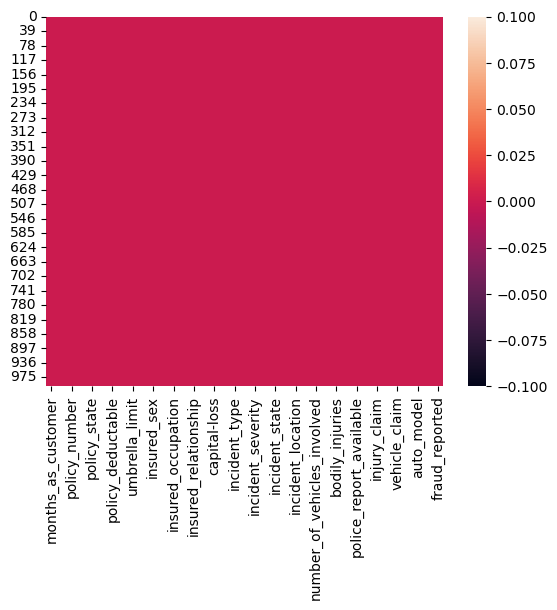

In [277]:
sns.heatmap(df.isnull()) # #checking the null values in columns by using heatmap 

No null values are present now.

Handle the missing values:

In [278]:
# checking the missing value in each column
positions = df.isin(['?'])
count_per_column = positions.sum(axis=0)
print("\nCount of '?' in each column:")
print(count_per_column)


Count of '?' in each column:
months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage          

Missing values are present in 3 columns which are all object datatype

In [279]:
df['collision_type'].value_counts()

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: count, dtype: int64

In [280]:
df['property_damage'].value_counts()

property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64

In [281]:
df['police_report_available'].value_counts()

police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64

In [282]:
#Filling ? values,replace the values with mode
df['collision_type']=df['collision_type'].replace('?','Rear Collision')
df['property_damage']=df['property_damage'].replace('?','NO')
df['police_report_available']=df['police_report_available'].replace('?','NO')

In [283]:
# Again checking the missing value in each column
positions = df.isin(['?'])
count_per_column = positions.sum(axis=0)
print("\nCount of '?' in each column:")
print(count_per_column)


Count of '?' in each column:
months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses    

No missing values are present now.

In [284]:
# checking the duplicate values
df.duplicated().sum()

0

No duplicate value is present in the dataset.

In [285]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64


age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64


policy_number
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: count, Length: 1000, dtype: int64


policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: count, L

In [286]:
df.nunique().to_frame("no. of unique values")  # no. of unique values in all columns of the Dataframe

no. of unique values
months_as_customer                            391
age                                            46
policy_number                                1000
policy_bind_date                              951
policy_state                                    3
policy_csl                                      3
policy_deductable                               3
policy_annual_premium                         991
umbrella_limit                                 11
insured_zip                                   995
insured_sex                                     2
insured_education_level                         7
insured_occupation                             14
insured_hobbies                                20
insured_relationship                            6
capital-gains                                 338
capital-loss                                  354
incident_date                                  60
incident_type                                   4
collision_type                                  3
incident_severity                               4
authorities_contacted                           4
incident_state                                  7
incident_city                                   7
incident_location                            1000
incident_hour_of_the_day                       24
number_of_vehicles_involved                     4
property_damage                                 2
bodily_injuries                                 3
witnesses                                       4
police_report_available                         2
total_claim_amount                            763
injury_claim                                  638
property_claim                                626
vehicle_claim                                 726
auto_make                                      14
auto_model                                     39
auto_year                                      21
fraud_reported                                  2

In [287]:
# dropping columns that are not necessary for prediction
df=df.drop(columns=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',  
           'incident_state','incident_city','auto_make','auto_model','auto_year'],axis=1) 


In [288]:
df.shape

(1000, 28)

In [289]:
#seperating the numerical and categorical columns
#Categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical columns:",categorical_col)

categorical columns: ['policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'property_damage', 'police_report_available', 'fraud_reported']


In [290]:
#Numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical columns:",numerical_col)
print("\n")

numerical columns: ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']




# Data Visualization

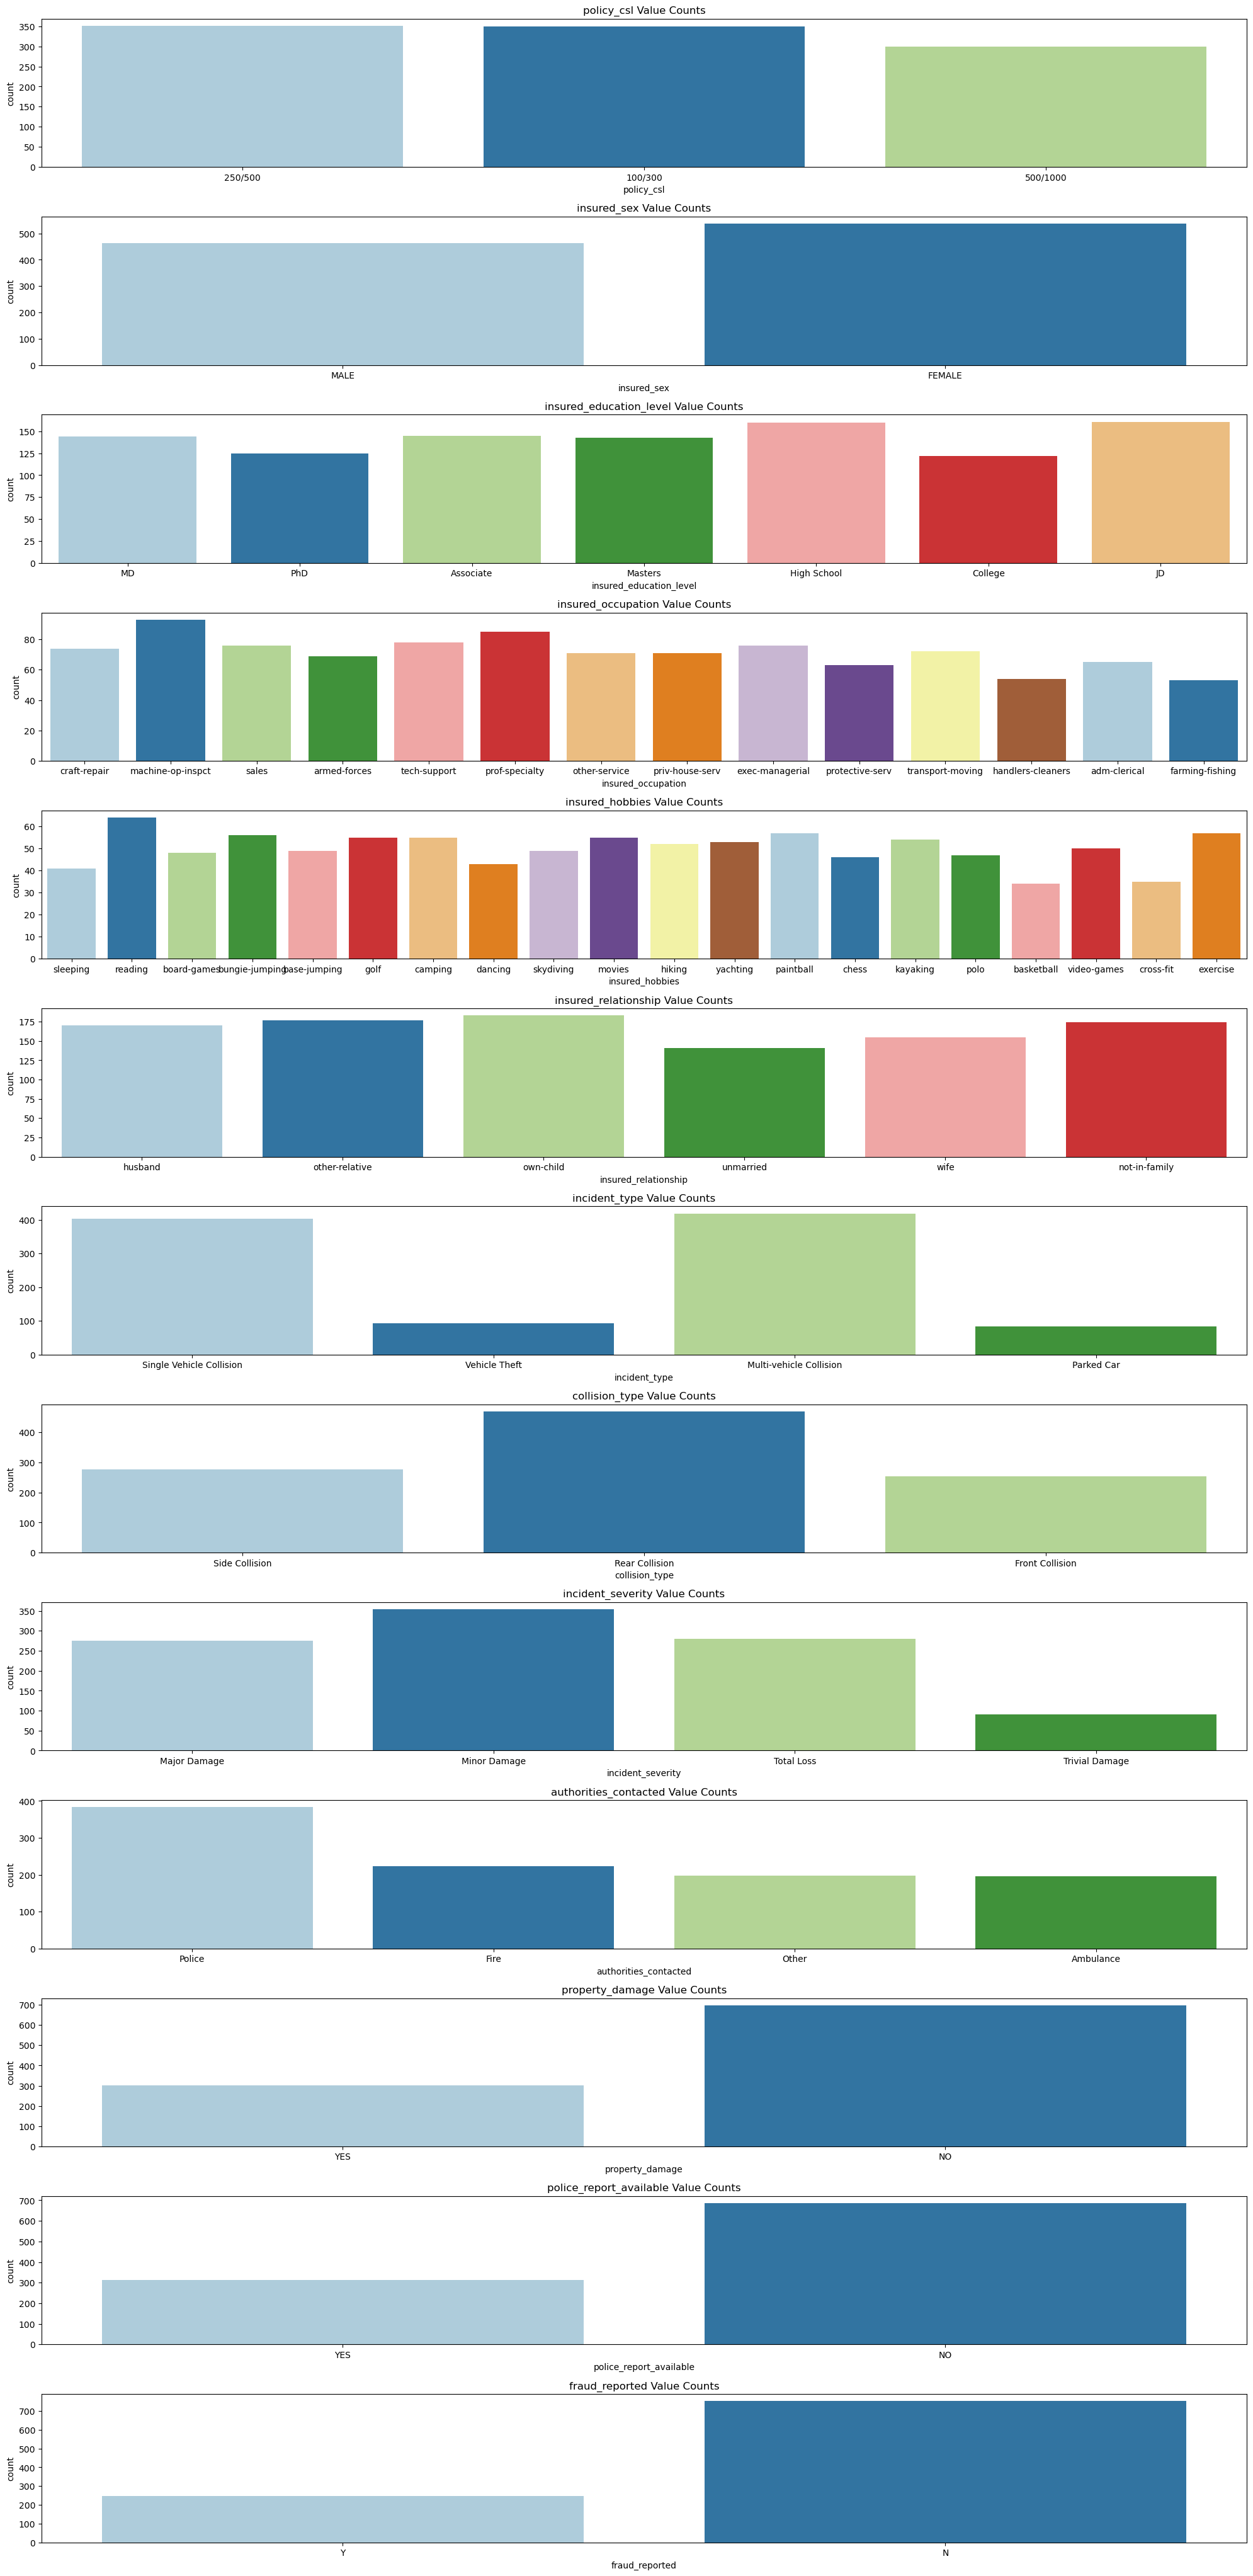

In [291]:
plt.figure(figsize=(20, 50 ))
plotnumber=1
for i in categorical_col:
    if plotnumber<=16:
        plt.subplot(16, 1, plotnumber)
        sns.countplot(x=df[i],palette='Paired')
        plt.title(f'{i} Value Counts')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Distribution of fraud_reported V/s policy_csl'}, xlabel='policy_csl', ylabel='count'>

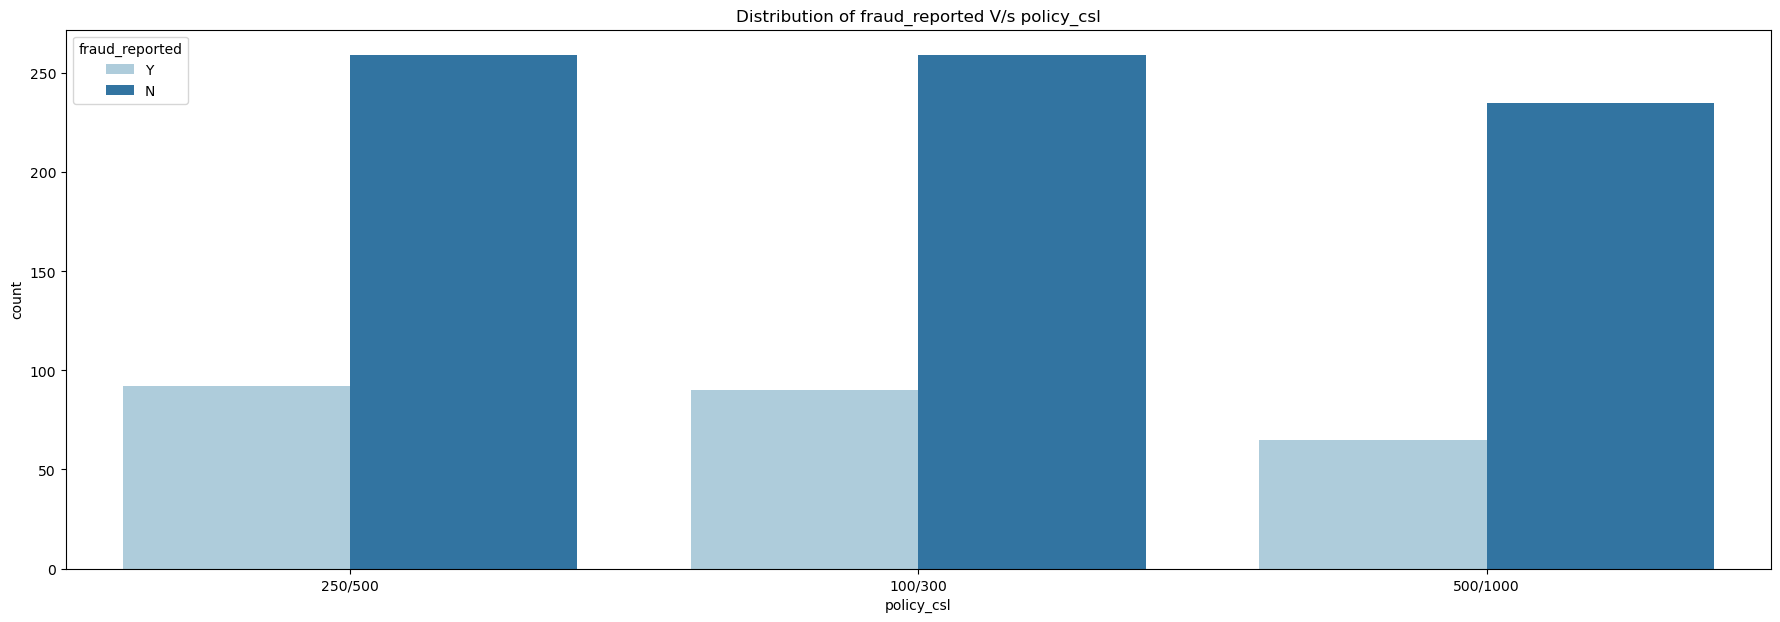

In [292]:
plt.figure(figsize=(22,7))
plt.title('Distribution of fraud_reported V/s policy_csl')
sns.countplot(x='policy_csl', hue='fraud_reported', data = df, palette="Paired")

<Axes: title={'center': 'Distribution of fraud_reported V/s collision_type'}, xlabel='collision_type', ylabel='count'>

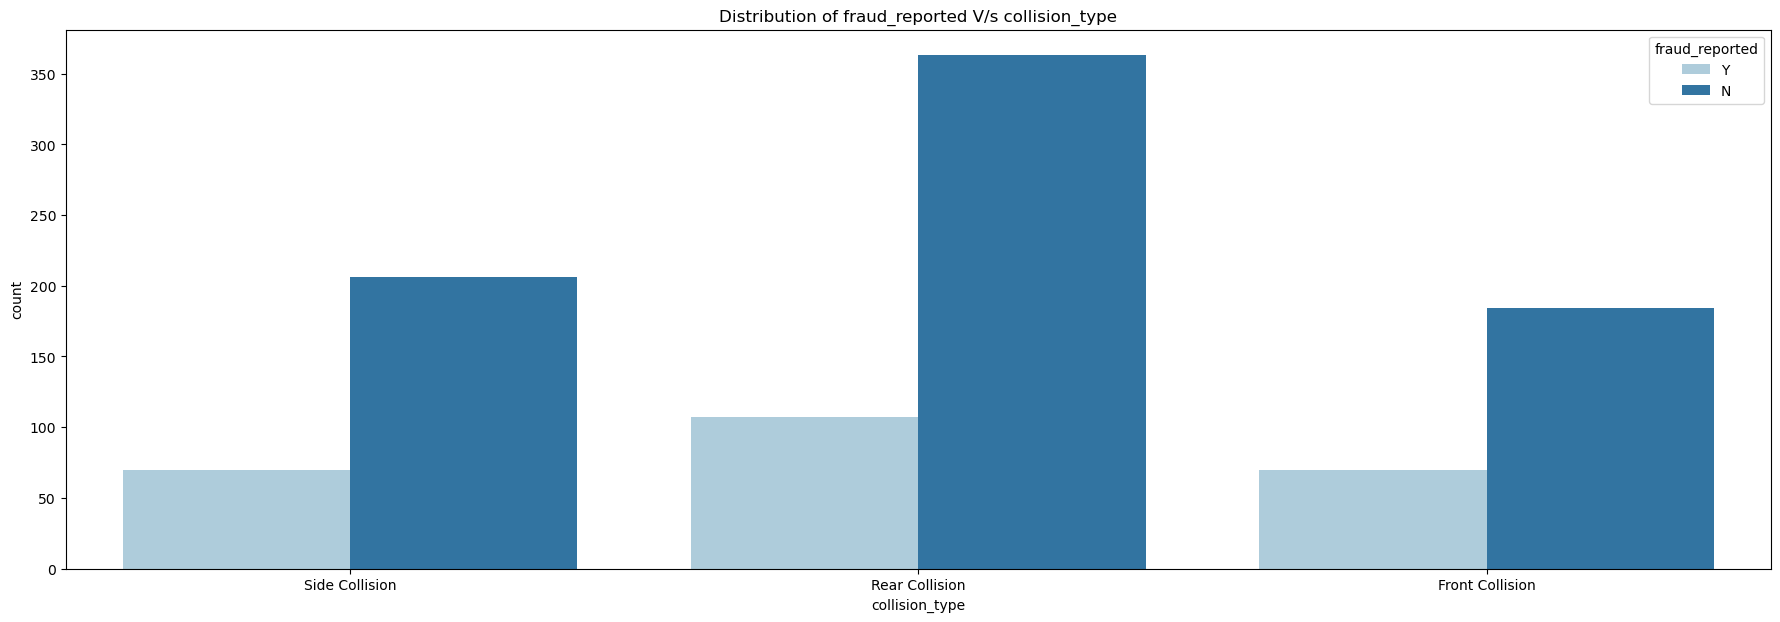

In [293]:
plt.figure(figsize=(22,7))
plt.title('Distribution of fraud_reported V/s collision_type')
sns.countplot(x='collision_type', hue='fraud_reported', data = df, palette="Paired")

<Axes: title={'center': 'Distribution of fraud_reported V/s insured_sex'}, xlabel='insured_sex', ylabel='count'>

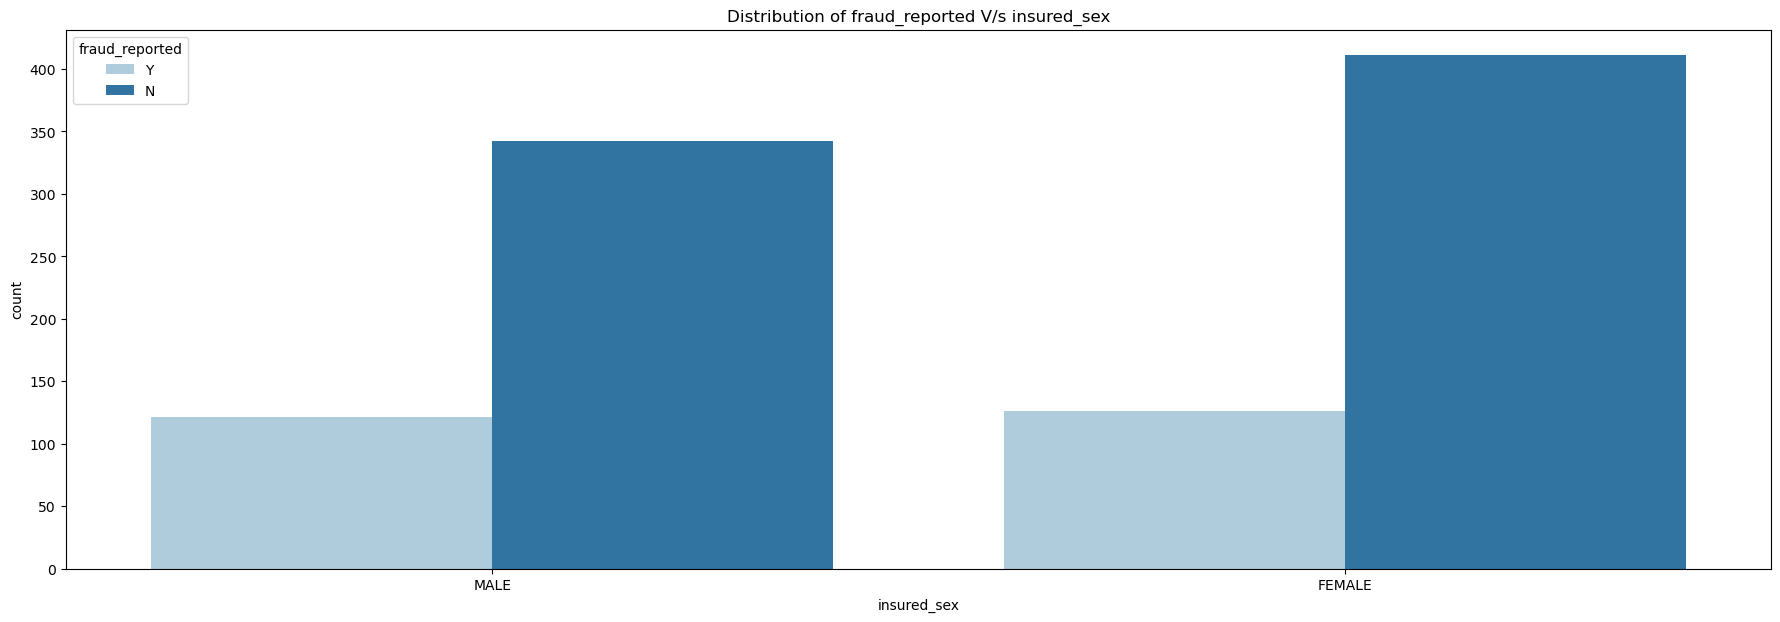

In [294]:
plt.figure(figsize=(22,7))
plt.title('Distribution of fraud_reported V/s insured_sex')
sns.countplot(x='insured_sex', hue='fraud_reported', data = df, palette="Paired")


<Axes: title={'center': 'Distribution of fraud_reported V/s insured_education_level'}, xlabel='insured_education_level', ylabel='count'>

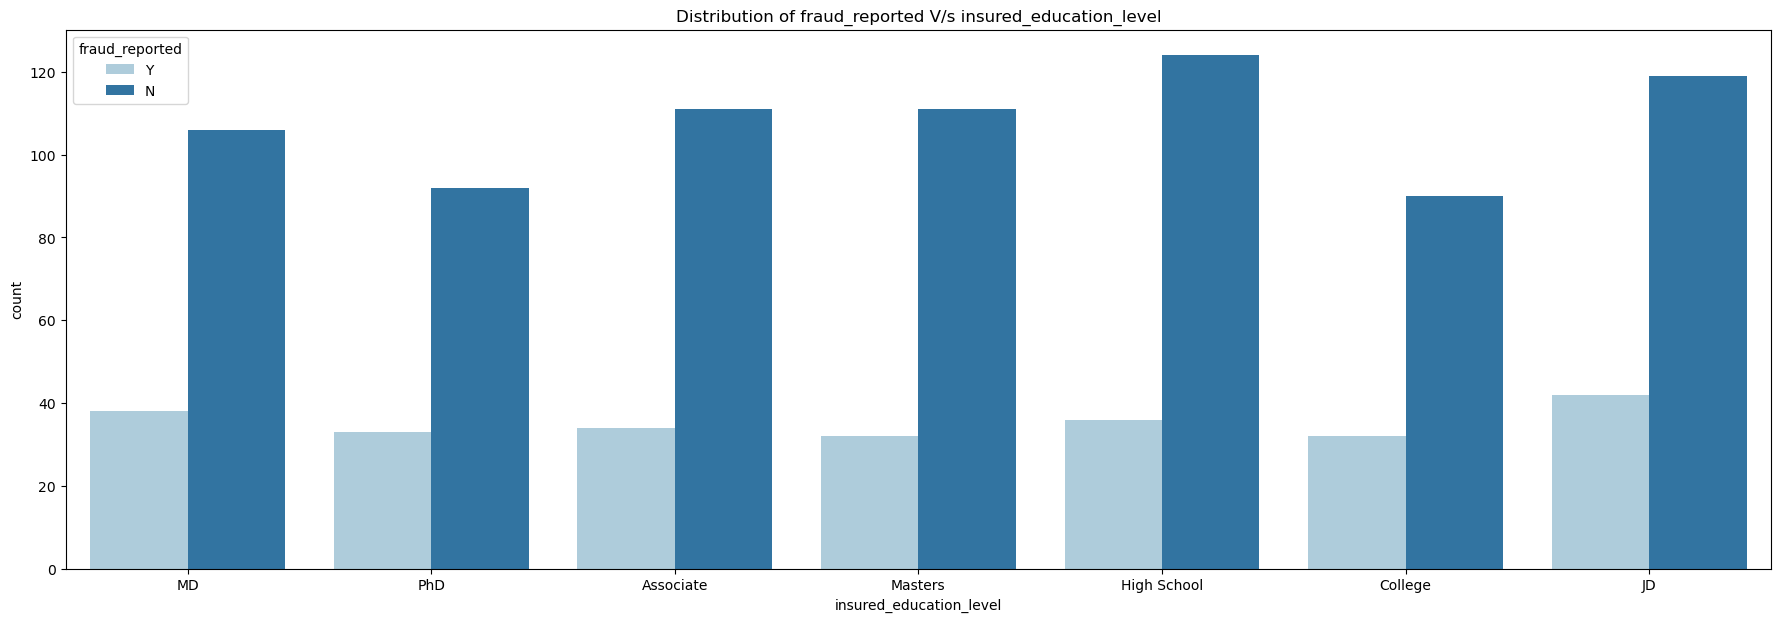

In [295]:
plt.figure(figsize=(22,7))
plt.title('Distribution of fraud_reported V/s insured_education_level')
sns.countplot(x='insured_education_level', hue='fraud_reported', data = df, palette="Paired")

<Axes: title={'center': 'Distribution of fraud_reported V/s insured_occupation'}, xlabel='insured_occupation', ylabel='count'>

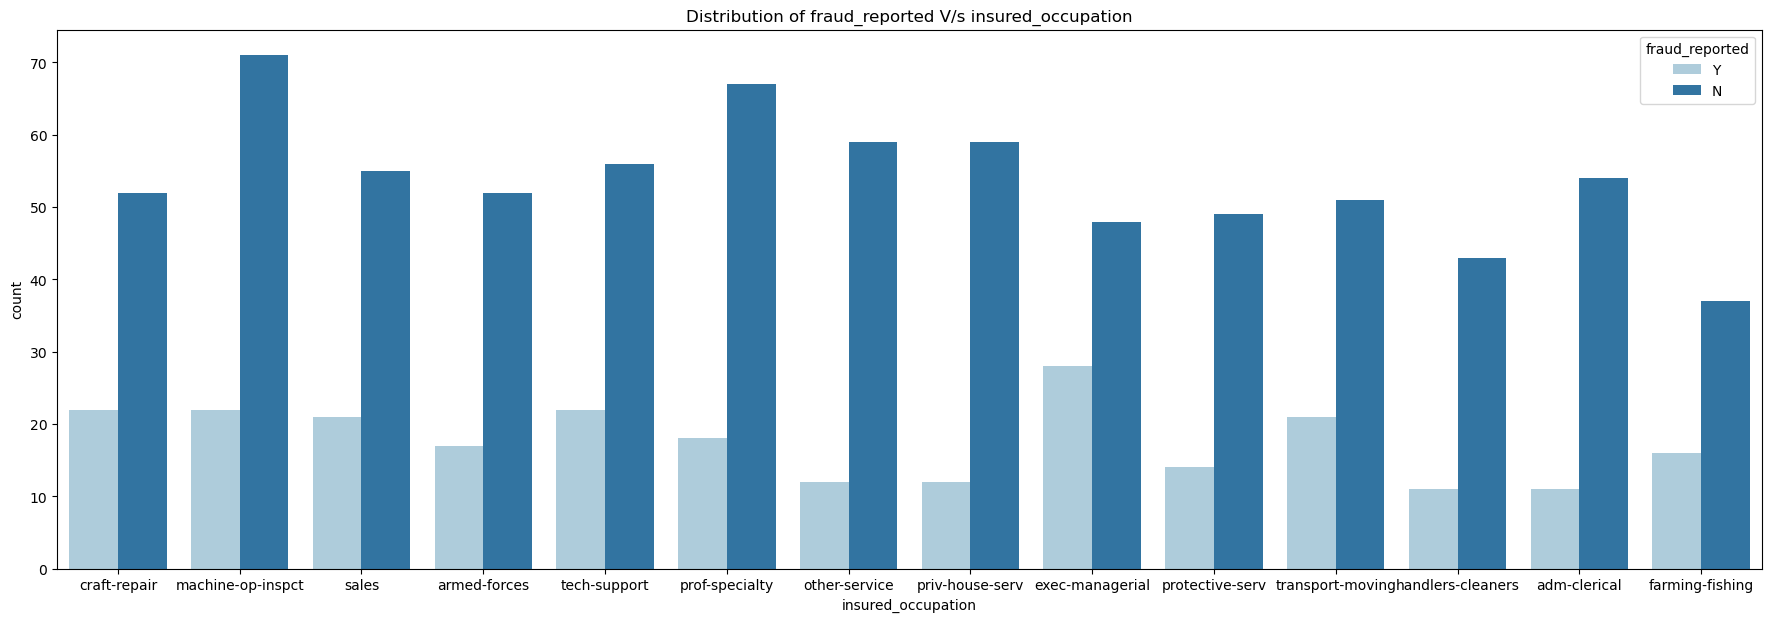

In [296]:
plt.figure(figsize=(22,7))
plt.title('Distribution of fraud_reported V/s insured_occupation')
sns.countplot(x='insured_occupation', hue='fraud_reported', data = df, palette="Paired")

<Axes: title={'center': 'Distribution of fraud_reported V/s insured_relationship'}, xlabel='insured_relationship', ylabel='count'>

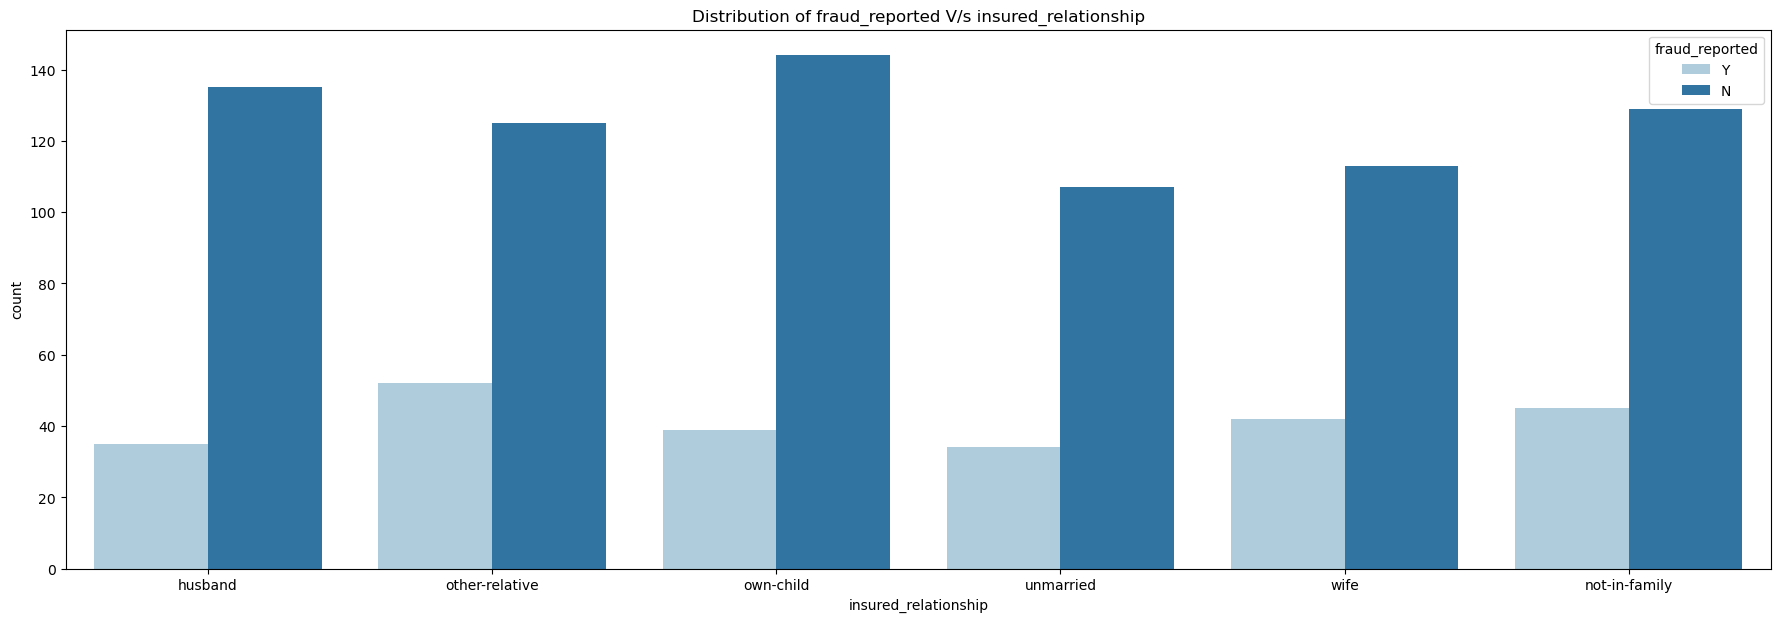

In [297]:
plt.figure(figsize=(22,7))
plt.title('Distribution of fraud_reported V/s insured_relationship')
sns.countplot(x='insured_relationship', hue='fraud_reported', data = df, palette="Paired")

<Axes: title={'center': 'Distribution of fraud_reported V/s incident_type'}, xlabel='incident_type', ylabel='count'>

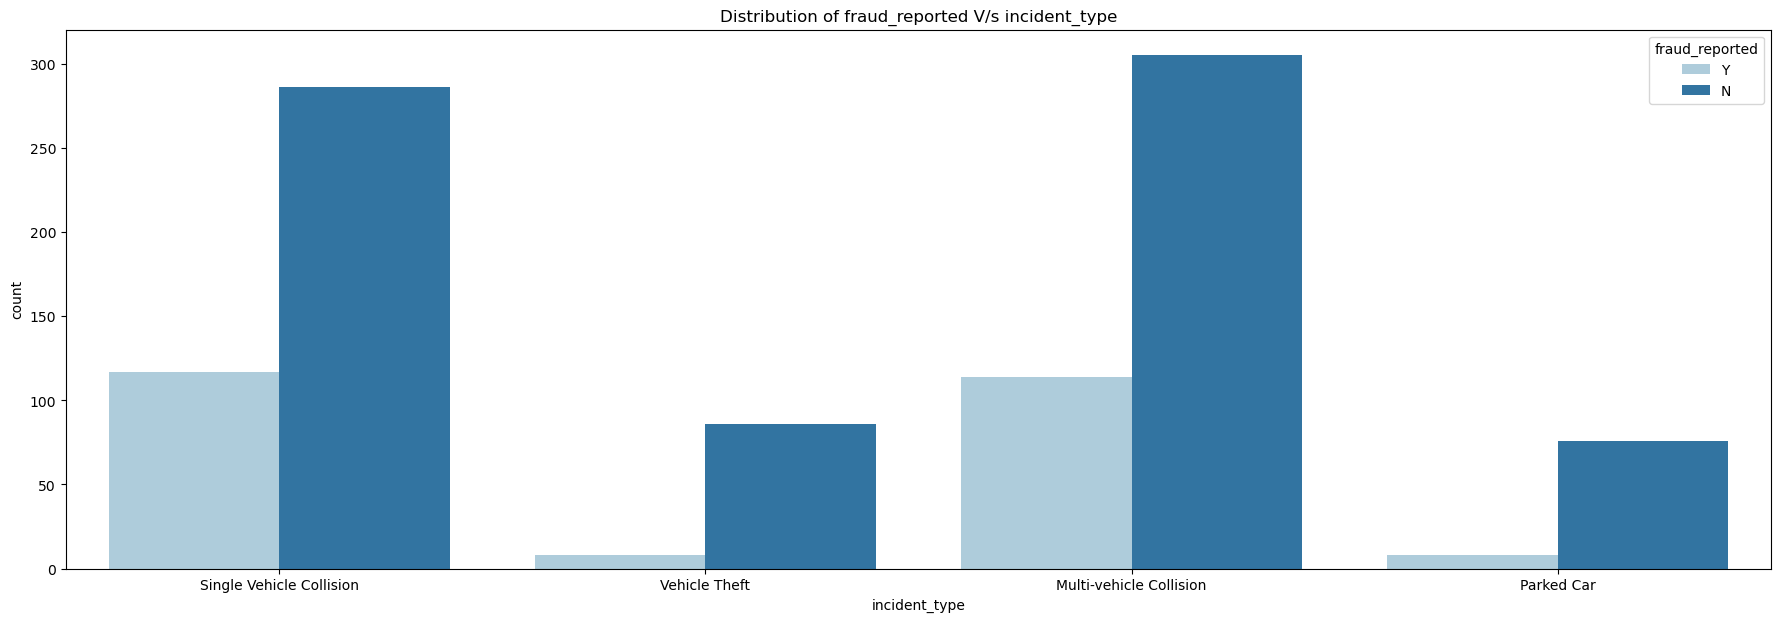

In [298]:
plt.figure(figsize=(22,7))
plt.title('Distribution of fraud_reported V/s incident_type')
sns.countplot(x='incident_type', hue='fraud_reported', data = df, palette="Paired")

<Axes: title={'center': 'Distribution of fraud_reported V/s incident_severity'}, xlabel='incident_severity', ylabel='count'>

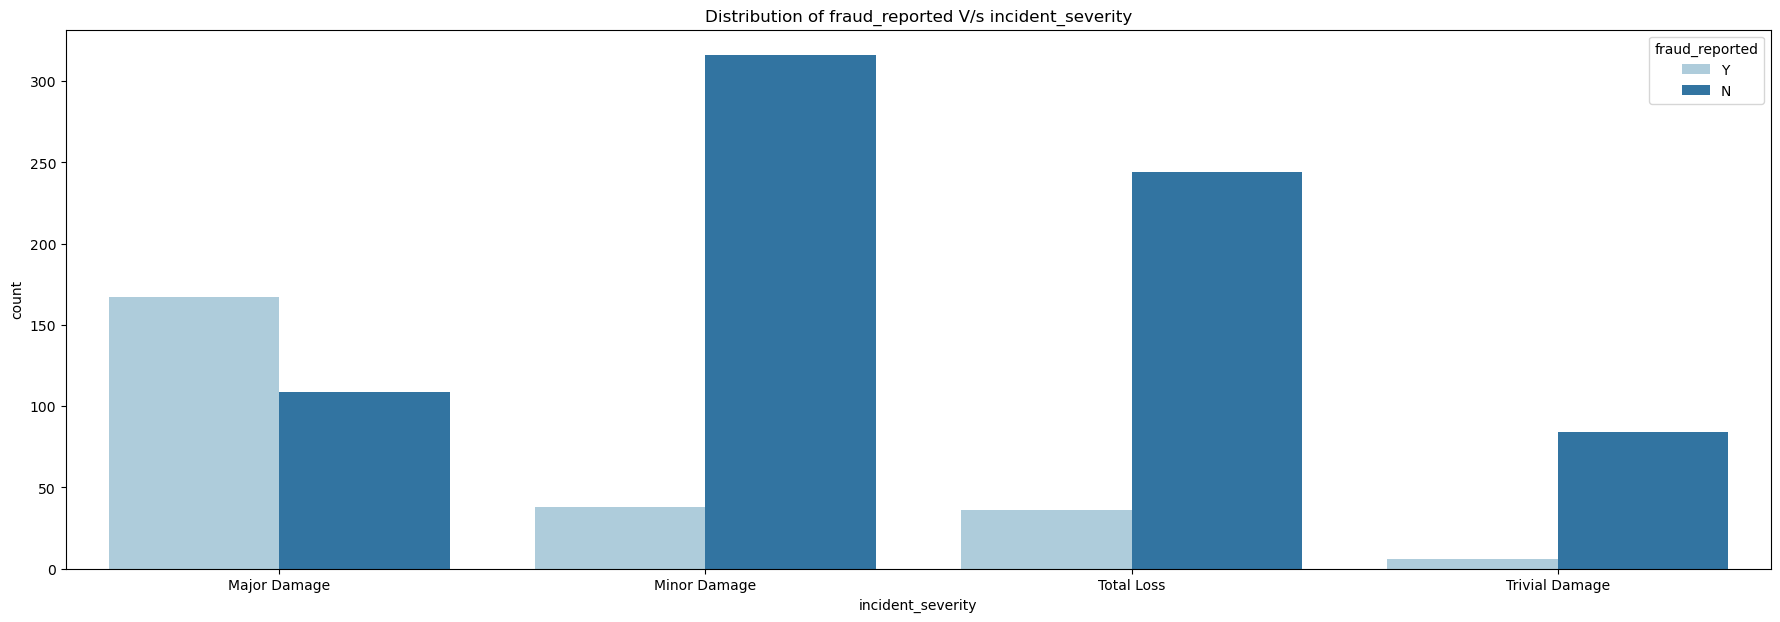

In [299]:
plt.figure(figsize=(22,7))
plt.title('Distribution of fraud_reported V/s incident_severity')
sns.countplot(x='incident_severity', hue='fraud_reported', data = df, palette="Paired")

<Axes: title={'center': 'Distribution of fraud_reported V/s authorities_contacted'}, xlabel='authorities_contacted', ylabel='count'>

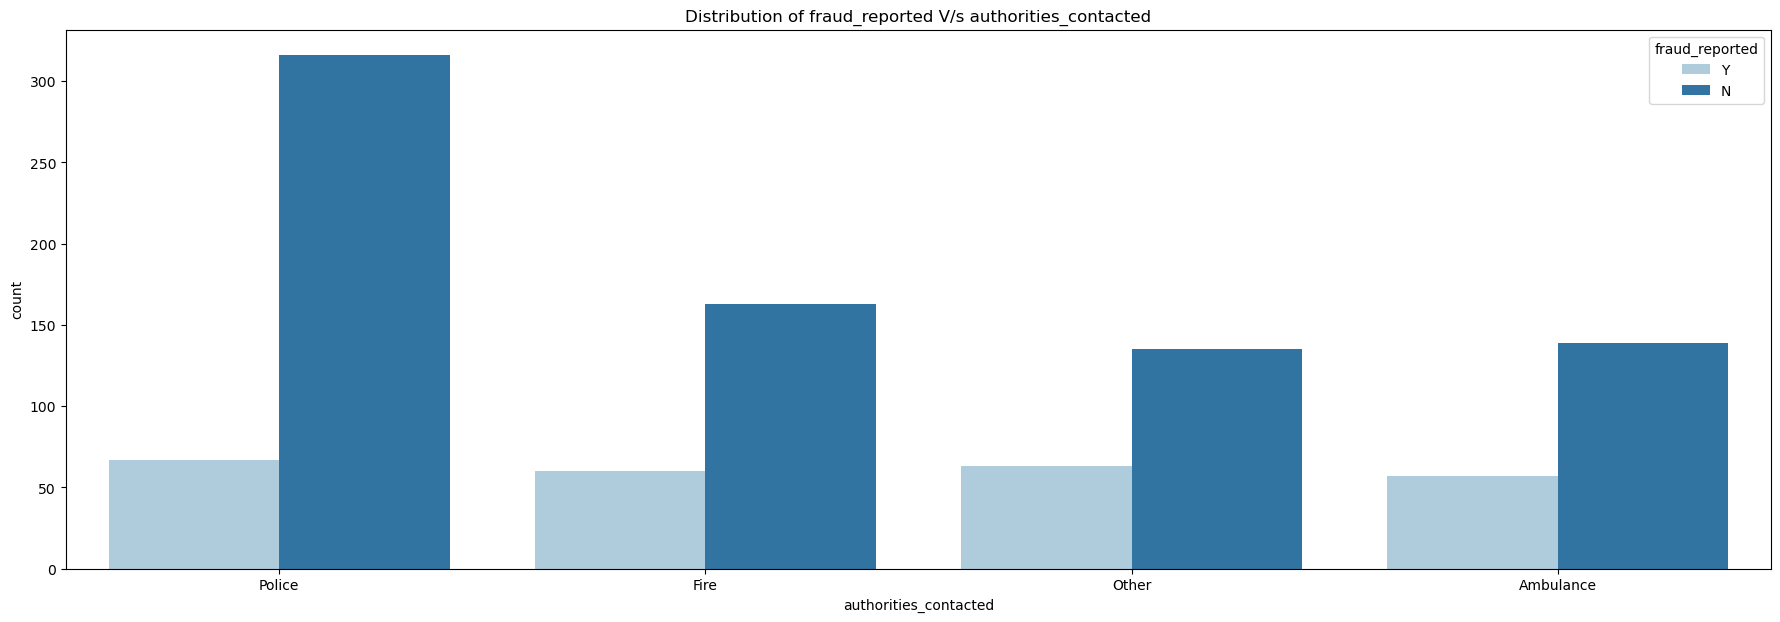

In [300]:
plt.figure(figsize=(22,7))
plt.title('Distribution of fraud_reported V/s authorities_contacted')
sns.countplot(x='authorities_contacted', hue='fraud_reported', data = df, palette="Paired")

<Axes: title={'center': 'Distribution of fraud_reported V/s property_damage'}, xlabel='property_damage', ylabel='count'>

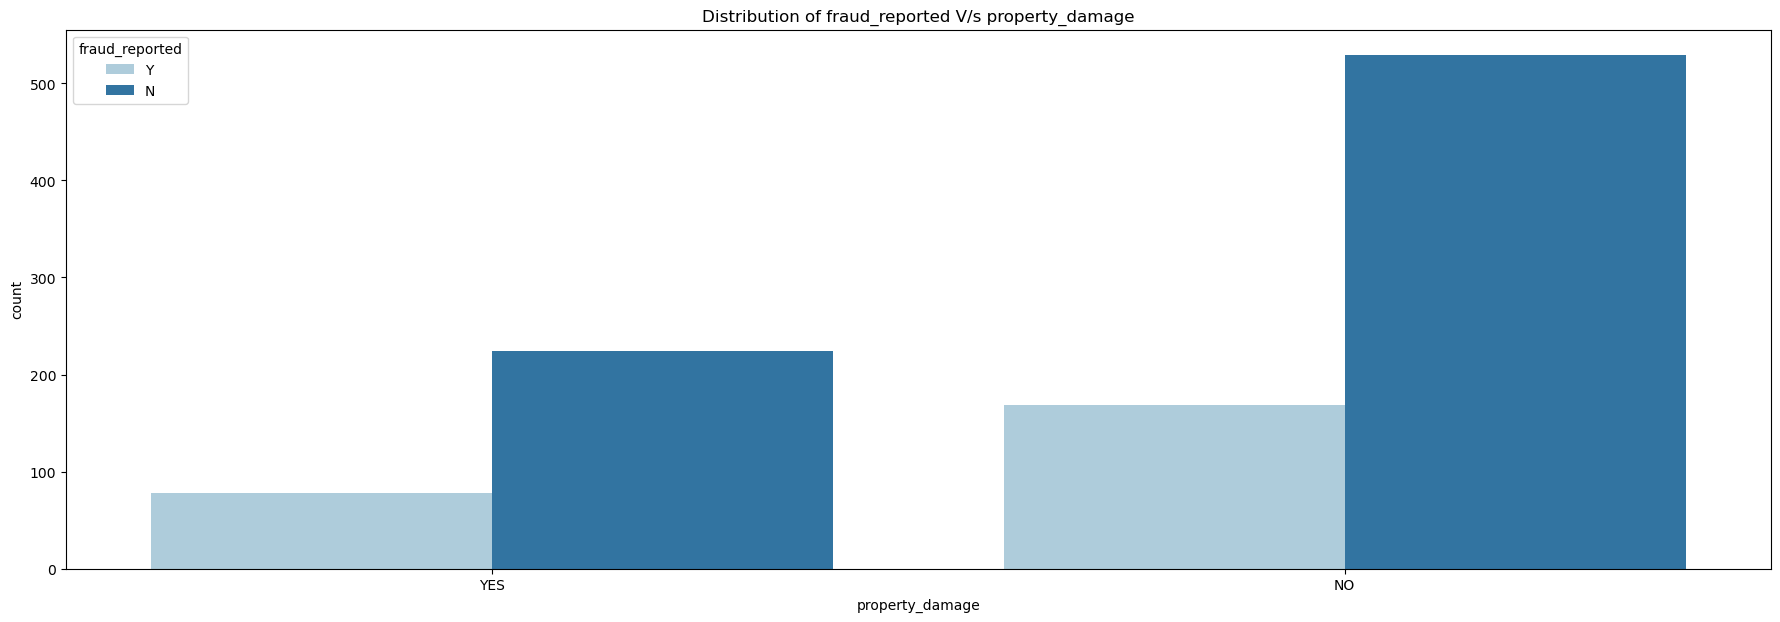

In [301]:
plt.figure(figsize=(22,7))
plt.title('Distribution of fraud_reported V/s property_damage')
sns.countplot(x='property_damage', hue='fraud_reported', data = df, palette="Paired")

<Axes: title={'center': 'Distribution of fraud_reported V/s police_report_available'}, xlabel='police_report_available', ylabel='count'>

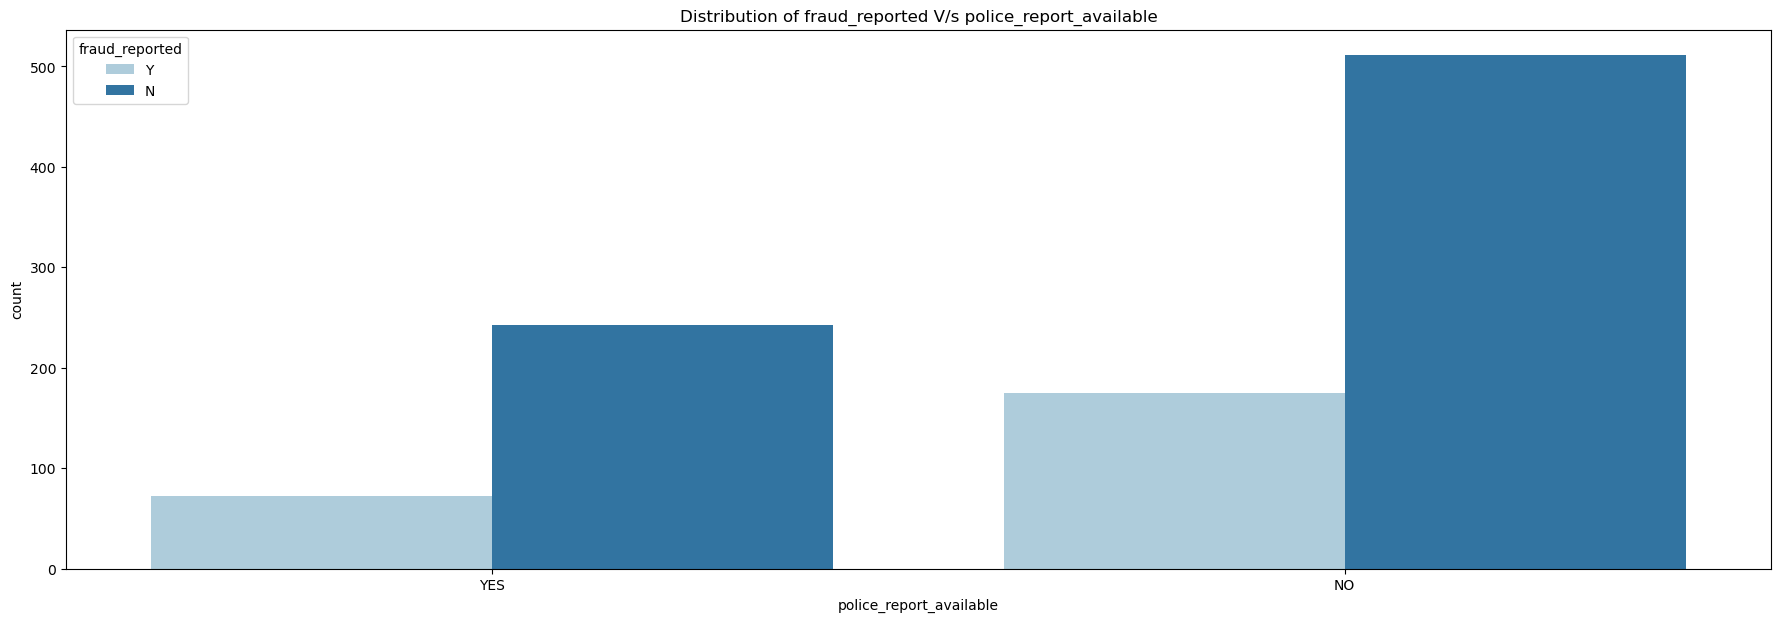

In [302]:
plt.figure(figsize=(22,7))
plt.title('Distribution of fraud_reported V/s police_report_available')
sns.countplot(x='police_report_available', hue='fraud_reported', data = df, palette="Paired")

<Axes: title={'center': 'Distribution of fraud_reported V/s insured_hobbies'}, xlabel='insured_hobbies', ylabel='count'>

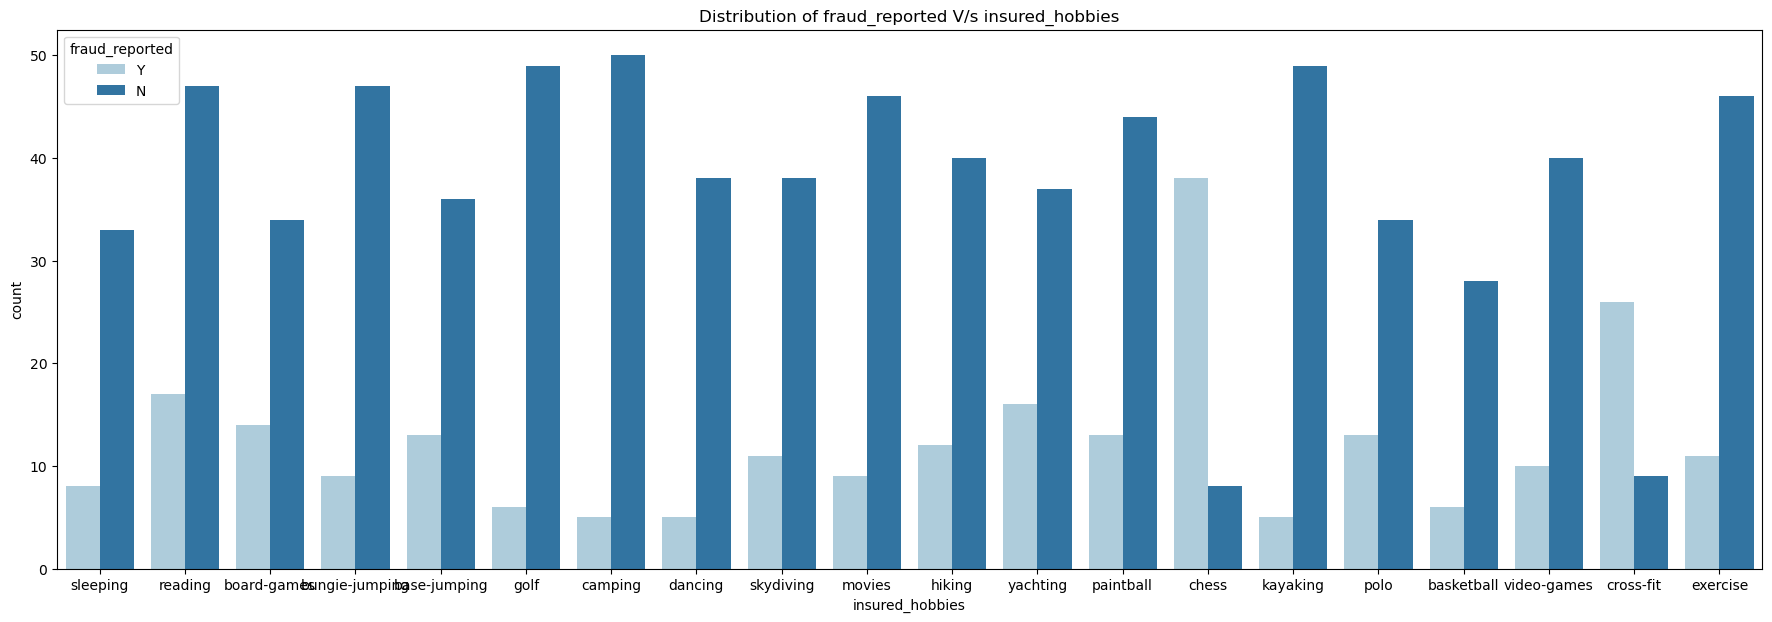

In [303]:
plt.figure(figsize=(22,7))
plt.title('Distribution of fraud_reported V/s insured_hobbies')
sns.countplot(x='insured_hobbies', hue='fraud_reported', data = df, palette="Paired")

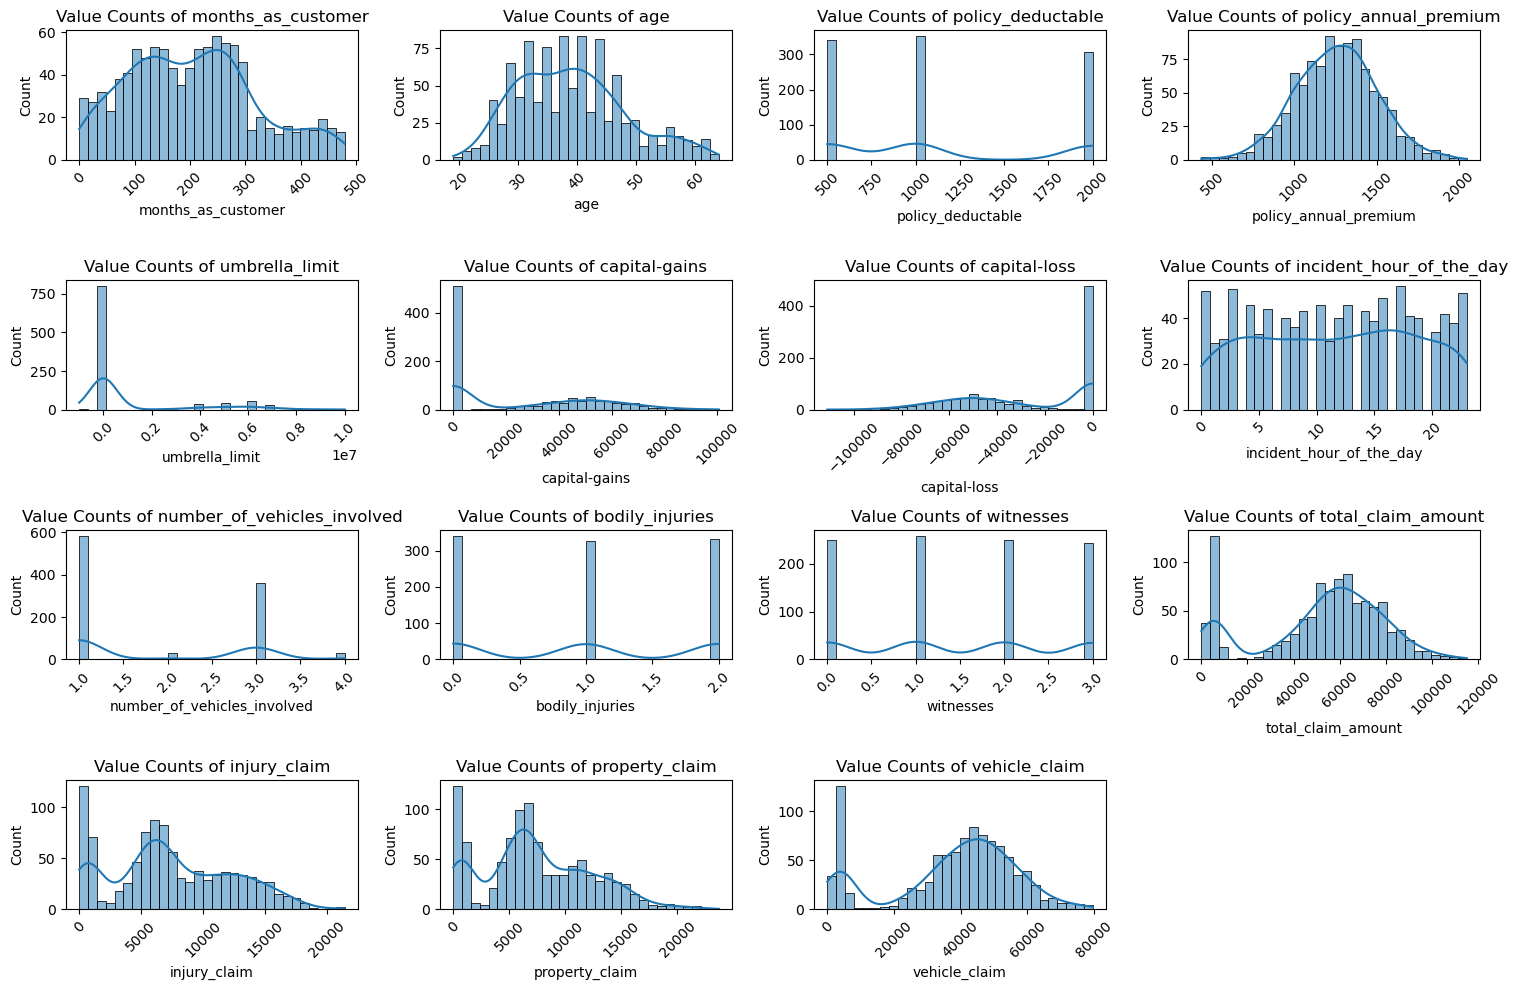

In [307]:
plt.figure(figsize=(15,10))
plotnumber=1    
for i in numerical_col:
    if plotnumber<=16:
        plt.subplot(4, 4, plotnumber)
        sns.histplot(df[i], kde=True, bins=30)
        plt.title(f'Value Counts of {i}')
        plt.xticks(rotation=45)
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

<Axes: xlabel='incident_hour_of_the_day', ylabel='count'>

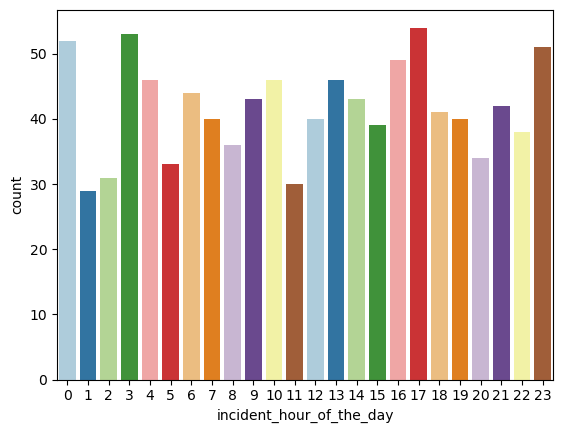

In [308]:
sns.countplot(x='incident_hour_of_the_day',palette='Paired',data=df)

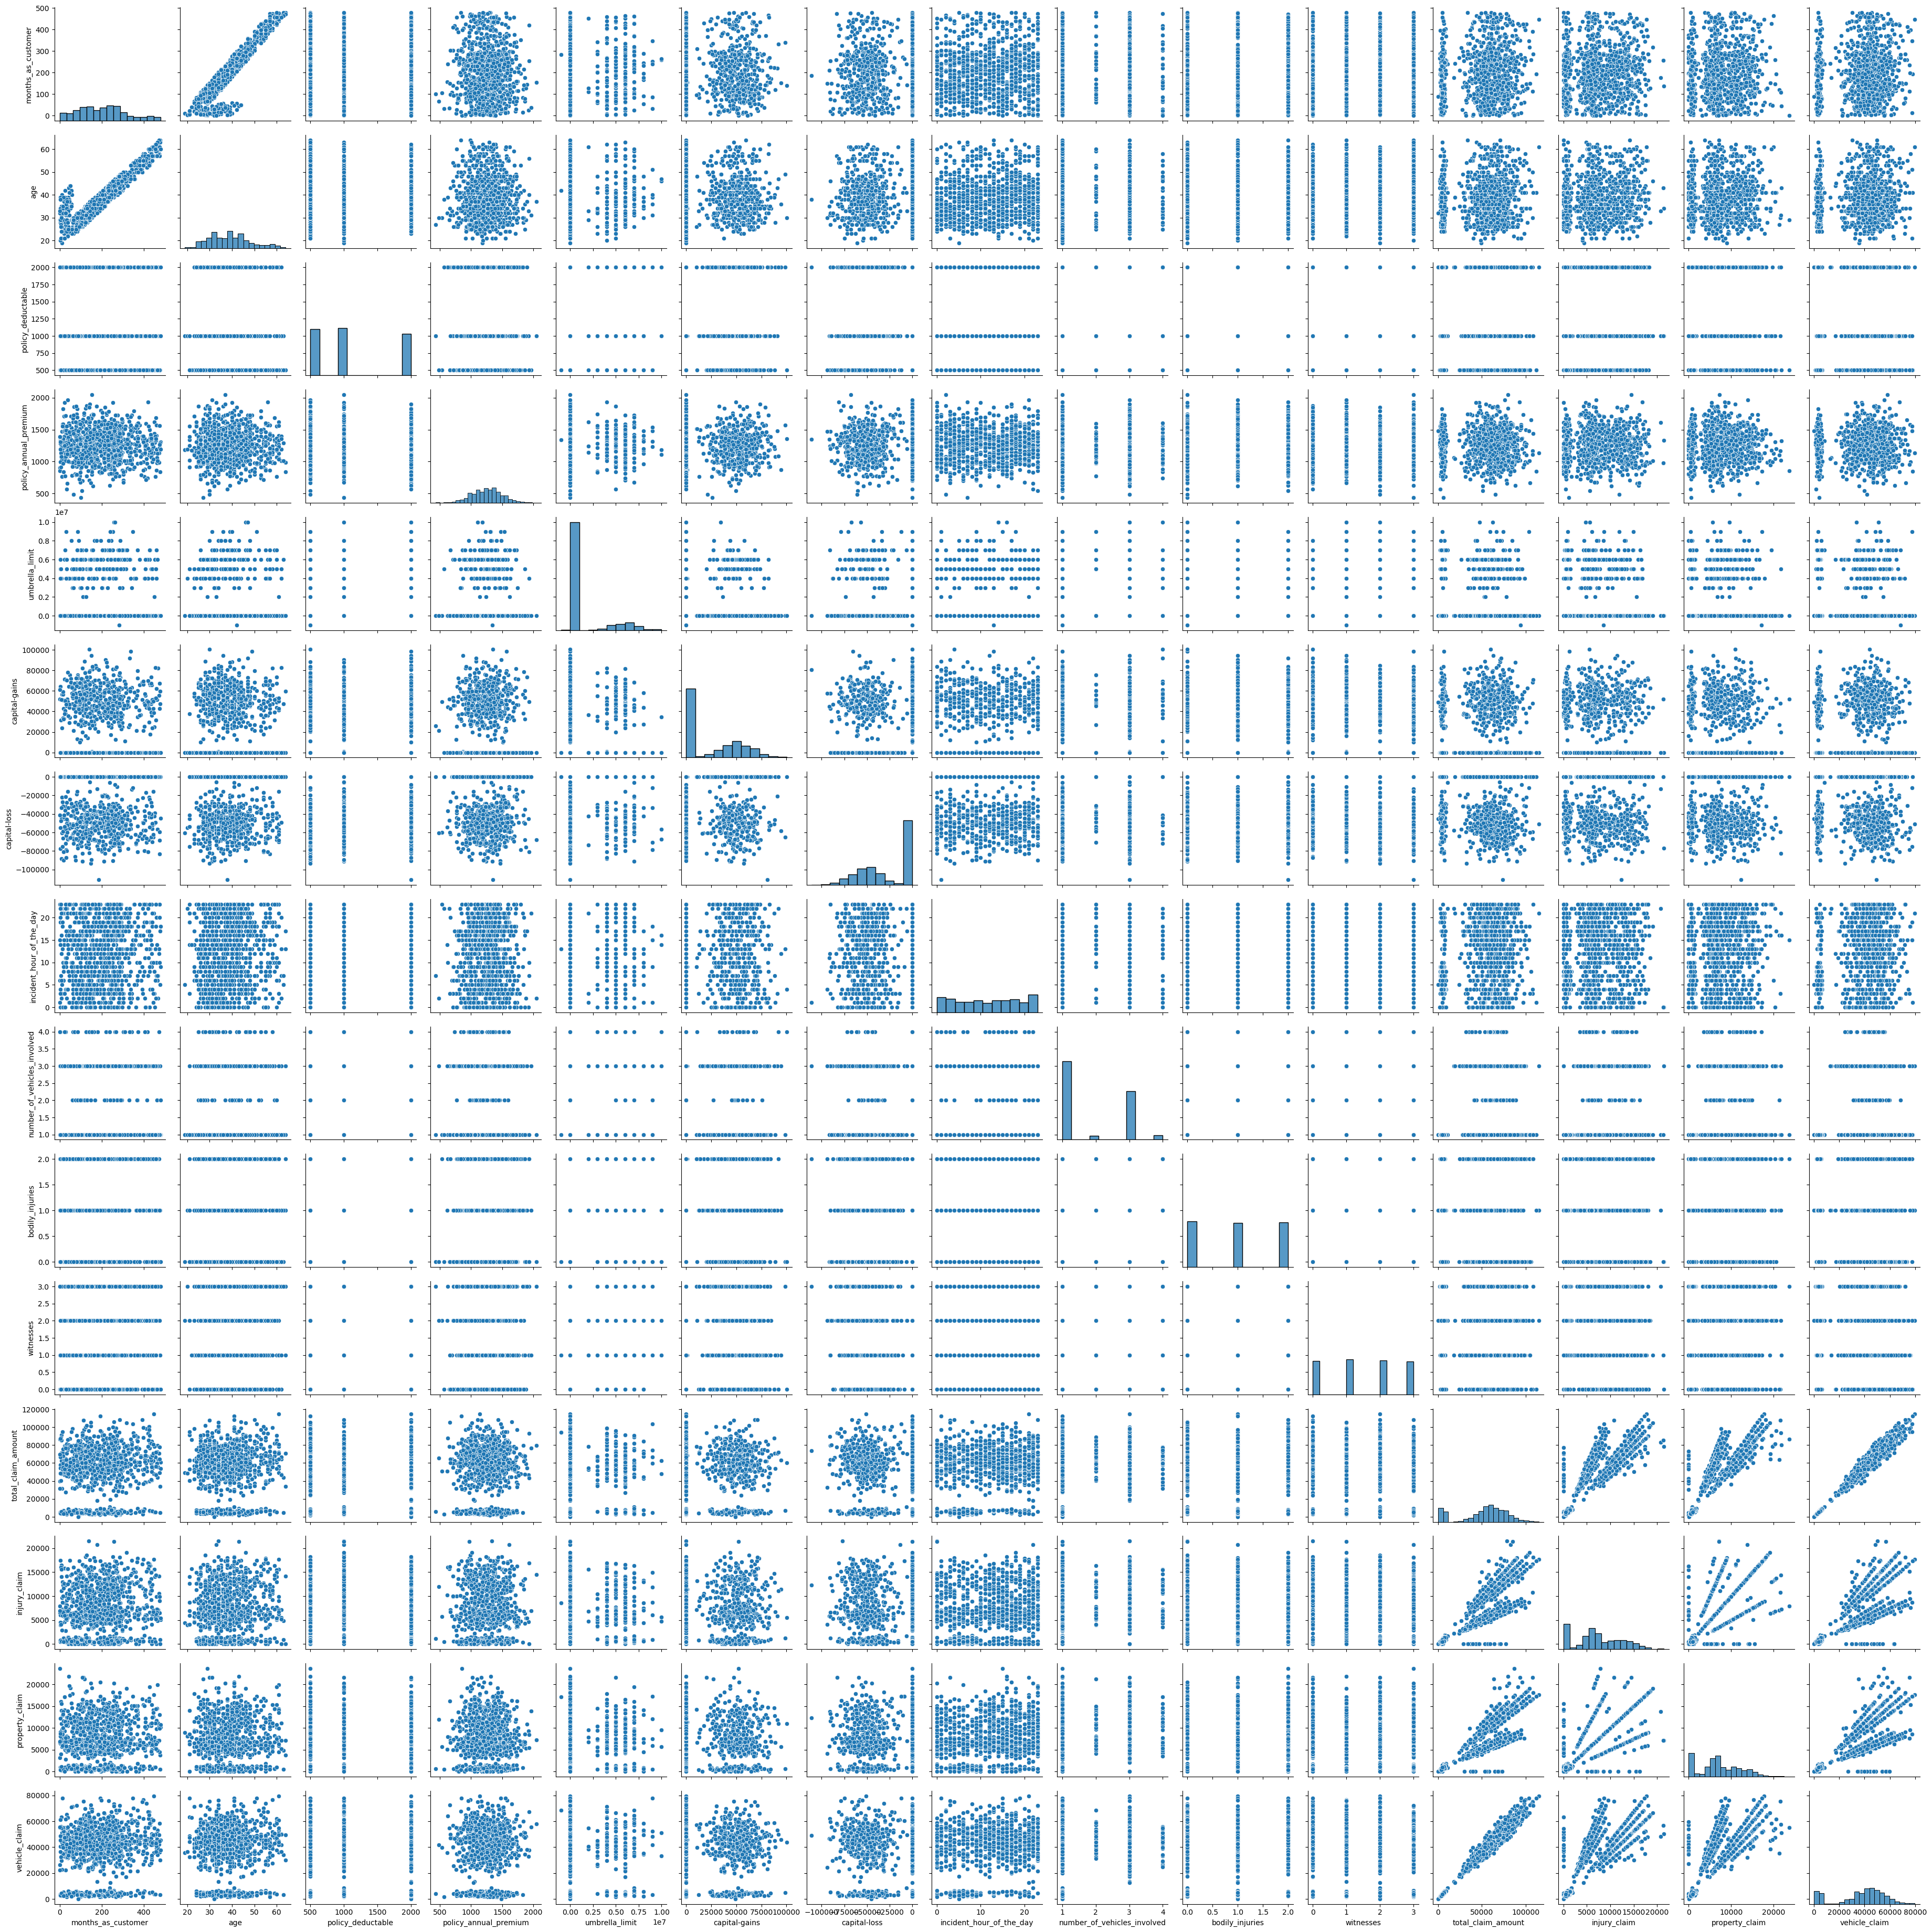

In [309]:
sns.pairplot(df)

# Label Encoding

In [310]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_col:
    df[i]=le.fit_transform(df[i])

In [311]:
df

months_as_customer  age  policy_csl  policy_deductable  \
0                   328   48           1               1000   
1                   228   42           1               2000   
2                   134   29           0               2000   
3                   256   41           1               2000   
4                   228   44           2               1000   
..                  ...  ...         ...                ...   
995                   3   38           2               1000   
996                 285   41           0               1000   
997                 130   34           1                500   
998                 458   62           2               2000   
999                 456   60           1               1000   

     policy_annual_premium  umbrella_limit  insured_sex  \
0                  1406.91               0            1   
1                  1197.22         5000000            1   
2                  1413.14         5000000            0   
3                  1415.74         6000000            0   
4                  1583.91         6000000            1   
..                     ...             ...          ...   
995                1310.80               0            0   
996                1436.79               0            0   
997                1383.49         3000000            0   
998                1356.92         5000000            1   
999                 766.19               0            0   

     insured_education_level  insured_occupation  insured_hobbies  \
0                          4                   2               17   
1                          4                   6               15   
2                          6                  11                2   
3                          6                   1                2   
4                          0                  11                2   
..                       ...                 ...              ...   
995                        5                   2               13   
996                        6                   9               17   
997                        5                   1                3   
998                        0                   5                0   
999                        0                  11               11   

     insured_relationship  capital-gains  capital-loss  incident_type  \
0                       0          53300             0              2   
1                       2              0             0              3   
2                       3          35100             0              0   
3                       4          48900        -62400              2   
4                       4          66000        -46000              3   
..                    ...            ...           ...            ...   
995                     4              0             0              2   
996                     5          70900             0              2   
997                     2          35100             0              0   
998                     5              0             0              2   
999                     0              0             0              1   

     collision_type  incident_severity  authorities_contacted  \
0                 2                  0                      3   
1                 1                  1                      3   
2                 1                  1                      3   
3                 0                  0                      3   
4                 1                  1                      3   
..              ...                ...                    ...   
995               0                  1                      1   
996               1                  0                      1   
997               2                  1                      3   
998               1                  0                      2   
999               1                  1                      3   

     incident_hour_of_the_day  number_of_vehicles_in

In [312]:
df.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_csl                   1000.0  9.510000e-01  8.045162e-01        0.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_sex                  1000.0  4.630000e-01  4.988786e-01        0.00   
insured_education_level      1000.0  2.966000e+00  1.948497e+00        0.00   
insured_occupation           1000.0  6.653000e+00  4.019048e+00        0.00   
insured_hobbies              1000.0  9.731000e+00  5.674049e+00        0.00   
insured_relationship         1000.0  2.416000e+00  1.681003e+00        0.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_type                1000.0  1.172000e+00  1.081474e+00        0.00   
collision_type               1000.0  1.022000e+00  7.280426e-01        0.00   
incident_severity            1000.0  1.184000e+00  9.396952e-01        0.00   
authorities_contacted        1000.0  1.768000e+00  1.156509e+00        0.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
property_damage              1000.0  3.020000e-01  4.593550e-01        0.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
police_report_available      1000.0  3.140000e-01  4.643486e-01        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
fraud_reported               1000.0  2.470000e-01  4.314825e-01        0.00   

                                    25%      50%        75%          max  
months_as_customer             115.7500    199.5    276.250       479.00  
age                             32.0000     38.0     44.000        64.00  
policy_csl                       0.0000      1.0      2.000         2.00  
policy_deductable              500.0000   1000.0   2000.000      2000.00  
policy_annual_premium         1089.6075   1257.2   1415.695      2047.59  
umbrella_limit                   0.0000      0.0      0.000  10000000.00  
insured_sex                      0.0000      0.0      1.000         1.00  
insured_education_level          1.0000      3.0      5.000         6.00  
insured_occupation               3.0000      7.0     10.000        13.00  
insured_hobbies                  5.0000     10.0     15.000        19.00  
insured_relationship             1.0000      2.0      4.000         5.00  
capital-gains                    0.0000      0.0  51025.000    100500.00  
capital-loss                -51500.0000 -23250.0      0.000         0.00  
incident_type                    0.0000      1.0      2.000         3.00  
collision_type                   0.0000      1.0      2.000         2.00  
incident_severity                0.0000      1.0      2.000         3.00  
authorities_contacted            1.0000      2.0      3.000         3.00  
incident_hour_of_the_day         6.0000     12.0     17.000        23.00  
number_of_vehicles_involved      1.0000      1.0      3.000         4.00  
property_damage                  0.0000      0.0      1.000         1.00  
bodily_injuries                  0.0000      1.0      2.000         2.00  
witnesses                        1.0000      1.0      2.000         3.00  
police_report

In [313]:
#Checking the correlation 
df.corr()

months_as_customer       age  policy_csl  \
months_as_customer                     1.000000  0.922098   -0.026819   
age                                    0.922098  1.000000   -0.015185   
policy_csl                            -0.026819 -0.015185    1.000000   
policy_deductable                      0.026807  0.029188    0.003384   
policy_annual_premium                  0.005018  0.014404    0.023978   
umbrella_limit                         0.015498  0.018126    0.021636   
insured_sex                            0.060925  0.073337   -0.010757   
insured_education_level               -0.000833  0.000969    0.009153   
insured_occupation                     0.009814  0.017220    0.015788   
insured_hobbies                       -0.093661 -0.081315   -0.005960   
insured_relationship                   0.069727  0.074832   -0.030063   
capital-gains                          0.006399 -0.007075    0.005249   
capital-loss                           0.020209  0.007368   -0.034612   
incident_type                         -0.017377 -0.025626    0.011997   
collision_type                        -0.072787 -0.075642    0.020641   
incident_severity                     -0.059581 -0.058439    0.022530   
authorities_contacted                  0.001784  0.004918    0.079217   
incident_hour_of_the_day               0.070639  0.087161   -0.001869   
number_of_vehicles_involved            0.014736  0.022102   -0.019403   
property_damage                        0.005488 -0.003408   -0.027634   
bodily_injuries                       -0.010162 -0.015679   -0.000595   
witnesses                              0.058383  0.052359    0.071500   
police_report_available               -0.022146 -0.020441   -0.001645   
total_claim_amount                     0.062108  0.069863   -0.055758   
injury_claim                           0.065329  0.075522   -0.078818   
property_claim                         0.034940  0.060898   -0.042216   
vehicle_claim                          0.061013  0.062588   -0.046791   
fraud_reported                         0.020544  0.012143   -0.037190   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_csl                            0.003384               0.023978   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010870              -0.006247   
insured_sex                          -0.009733               0.038853   
insured_education_level               0.015217              -0.019715   
insured_occupation                   -0.046733               0.035922   
insured_hobbies                       0.004061              -0.018019   
insured_relationship                 -0.022945               0.001925   
capital-gains                         0.035212              -0.013738   
capital-loss                         -0.023544               0.023547   
incident_type                        -0.038411               0.053603   
collision_type                       -0.053912               0.036556   
incident_severity                    -0.015711              -0.011155   
authorities_contacted                 0.007146              -0.051461   
incident_hour_of_the_day              0.060935              -0.001578   
number_of_vehicles_involved           0.051214              -0.045991   
property_damage                       0.015770               0.080738   
bodily_injuries                      -0.022765               0.026780   
witnesses                             0.066639               0.002332   
police_report_available               0.038036               0.021998   
total_claim_amount                    0.022839               0.009094   
injury_claim                          0.039107              -0.017633   
property_clai

<Axes: >

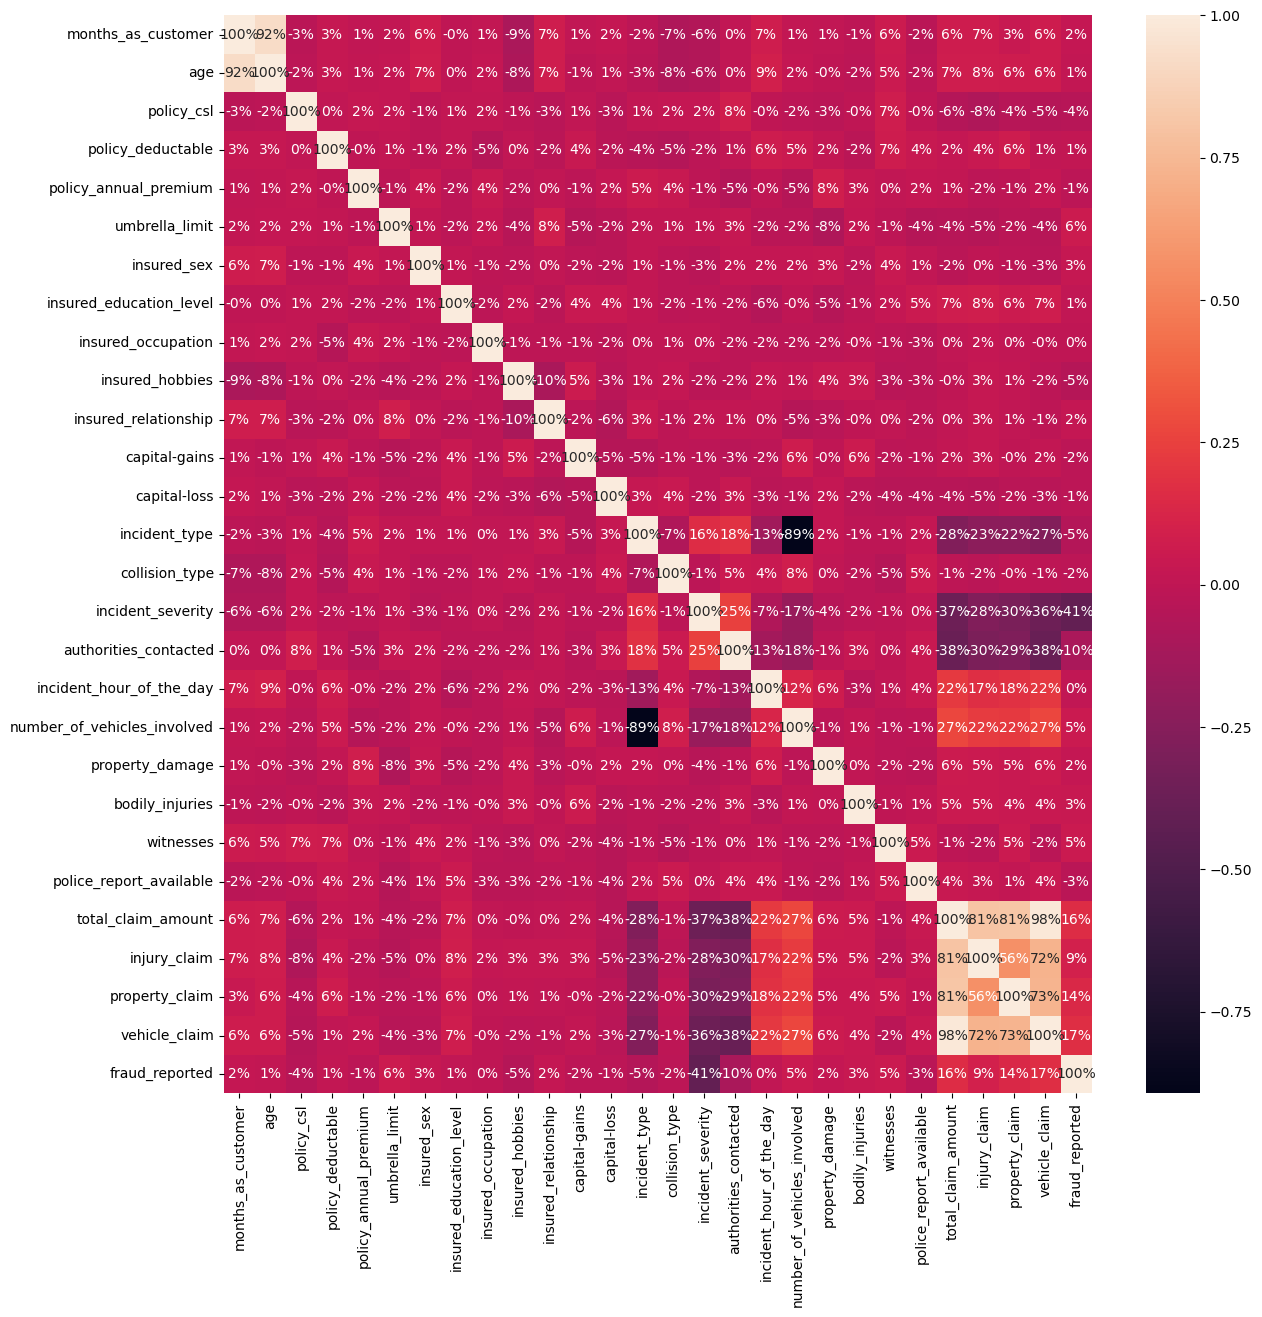

In [314]:
#Visualizing the correlation
plt.figure(figsize=(14,14))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [315]:
corr_matrix=df.corr()
corr_matrix['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
insured_relationship           0.021043
months_as_customer             0.020544
property_damage                0.017202
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
policy_annual_premium         -0.014480
capital-loss                  -0.014863
collision_type                -0.017315
capital-gains                 -0.019173
police_report_available       -0.027768
policy_csl                    -0.037190
insured_hobbies               -0.046838


In [316]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.301862
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728
total_claim_amount            -0.594582
injury_claim                   0.264811


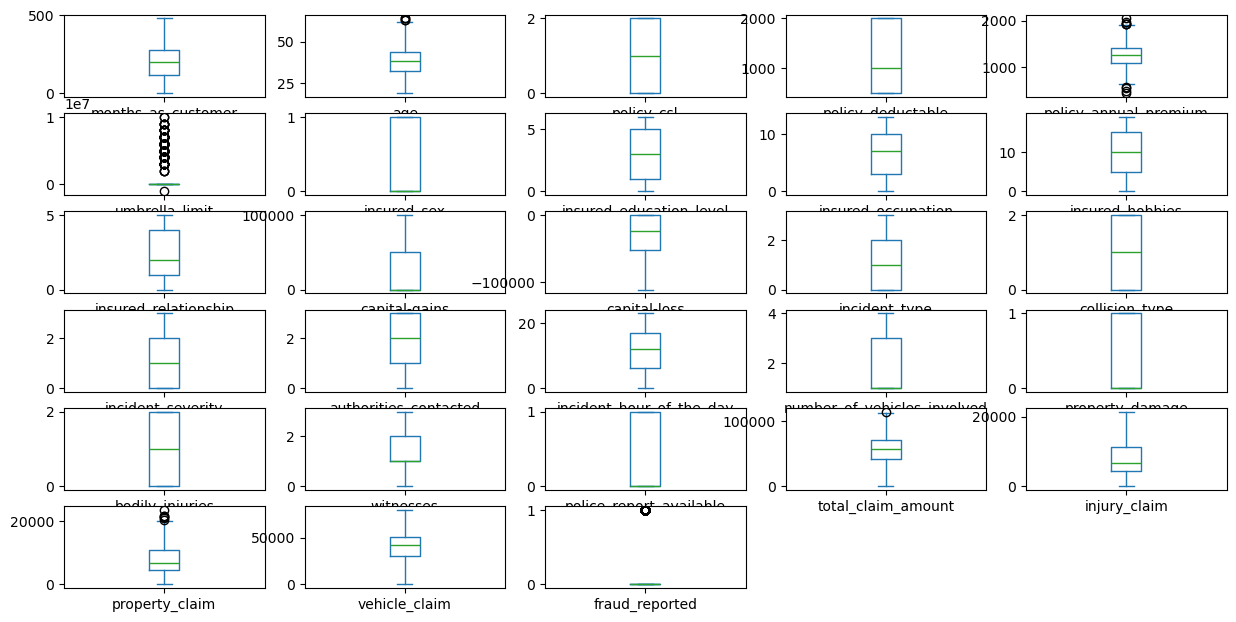

In [317]:
#Checking outliers using boxplots
df.plot(kind='box',subplots=True,layout=(8,5),figsize=(15,10));

In [318]:
#Removing the Outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975]), array([ 5,  5,  5,  5,  5,  4,  4,  5,  5,  5,  5, 25,  5,  5,  5,  4, 12,
        5,  5,  5]))


In [319]:
df_new=df[(z<3).all(axis=1)]
df_new

months_as_customer  age  policy_csl  policy_deductable  \
0                   328   48           1               1000   
1                   228   42           1               2000   
2                   134   29           0               2000   
3                   256   41           1               2000   
4                   228   44           2               1000   
..                  ...  ...         ...                ...   
995                   3   38           2               1000   
996                 285   41           0               1000   
997                 130   34           1                500   
998                 458   62           2               2000   
999                 456   60           1               1000   

     policy_annual_premium  umbrella_limit  insured_sex  \
0                  1406.91               0            1   
1                  1197.22         5000000            1   
2                  1413.14         5000000            0   
3                  1415.74         6000000            0   
4                  1583.91         6000000            1   
..                     ...             ...          ...   
995                1310.80               0            0   
996                1436.79               0            0   
997                1383.49         3000000            0   
998                1356.92         5000000            1   
999                 766.19               0            0   

     insured_education_level  insured_occupation  insured_hobbies  \
0                          4                   2               17   
1                          4                   6               15   
2                          6                  11                2   
3                          6                   1                2   
4                          0                  11                2   
..                       ...                 ...              ...   
995                        5                   2               13   
996                        6                   9               17   
997                        5                   1                3   
998                        0                   5                0   
999                        0                  11               11   

     insured_relationship  capital-gains  capital-loss  incident_type  \
0                       0          53300             0              2   
1                       2              0             0              3   
2                       3          35100             0              0   
3                       4          48900        -62400              2   
4                       4          66000        -46000              3   
..                    ...            ...           ...            ...   
995                     4              0             0              2   
996                     5          70900             0              2   
997                     2          35100             0              0   
998                     5              0             0              2   
999                     0              0             0              1   

     collision_type  incident_severity  authorities_contacted  \
0                 2                  0                      3   
1                 1                  1                      3   
2                 1                  1                      3   
3                 0                  0                      3   
4                 1                  1                      3   
..              ...                ...                    ...   
995               0                  1                      1   
996               1                  0                      1   
997               2                  1                      3   
998               1                  0                      2   
999               1                  1                      3   

     incident_hour_of_the_day  number_of_vehicles_in

In [320]:
print('shape before removing the outliers:',df.shape)
print('shape after removing the outliers:',df_new.shape)

shape before removing the outliers: (1000, 28)
shape after removing the outliers: (980, 28)


In [321]:
#%data loss calculation
loss_percent=((1000-980)/1000)*100
print(loss_percent)

2.0


2% data loss is acceptale.

In [322]:
df1=df_new

In [323]:
df1

months_as_customer  age  policy_csl  policy_deductable  \
0                   328   48           1               1000   
1                   228   42           1               2000   
2                   134   29           0               2000   
3                   256   41           1               2000   
4                   228   44           2               1000   
..                  ...  ...         ...                ...   
995                   3   38           2               1000   
996                 285   41           0               1000   
997                 130   34           1                500   
998                 458   62           2               2000   
999                 456   60           1               1000   

     policy_annual_premium  umbrella_limit  insured_sex  \
0                  1406.91               0            1   
1                  1197.22         5000000            1   
2                  1413.14         5000000            0   
3                  1415.74         6000000            0   
4                  1583.91         6000000            1   
..                     ...             ...          ...   
995                1310.80               0            0   
996                1436.79               0            0   
997                1383.49         3000000            0   
998                1356.92         5000000            1   
999                 766.19               0            0   

     insured_education_level  insured_occupation  insured_hobbies  \
0                          4                   2               17   
1                          4                   6               15   
2                          6                  11                2   
3                          6                   1                2   
4                          0                  11                2   
..                       ...                 ...              ...   
995                        5                   2               13   
996                        6                   9               17   
997                        5                   1                3   
998                        0                   5                0   
999                        0                  11               11   

     insured_relationship  capital-gains  capital-loss  incident_type  \
0                       0          53300             0              2   
1                       2              0             0              3   
2                       3          35100             0              0   
3                       4          48900        -62400              2   
4                       4          66000        -46000              3   
..                    ...            ...           ...            ...   
995                     4              0             0              2   
996                     5          70900             0              2   
997                     2          35100             0              0   
998                     5              0             0              2   
999                     0              0             0              1   

     collision_type  incident_severity  authorities_contacted  \
0                 2                  0                      3   
1                 1                  1                      3   
2                 1                  1                      3   
3                 0                  0                      3   
4                 1                  1                      3   
..              ...                ...                    ...   
995               0                  1                      1   
996               1                  0                      1   
997               2                  1                      3   
998               1                  0                      2   
999               1                  1                      3   

     incident_hour_of_the_day  number_of_vehicles_in

In [324]:
#Splitting the independent and target variable in x and y 
x=df1.drop(['fraud_reported'],axis=1)
y=df1['fraud_reported']

In [325]:
#Using StandardScaler to scale the data 
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.06956809,  0.98335151,  0.06723144, ..., -0.18762685,
         1.17601472,  0.75382361],
       [ 0.20272605,  0.32971067,  0.06723144, ..., -1.36100513,
        -1.37898411, -1.82467913],
       [-0.61210547, -1.08651116, -1.17591597, ...,  0.05605904,
        -0.73814698, -0.78467771],
       ...,
       [-0.64677915, -0.54181045,  0.06723144, ...,  0.01510343,
         0.02376035,  0.77612073],
       [ 2.19646275,  2.50851348,  1.31037885, ..., -0.45179055,
        -0.45217081, -0.07116985],
       [ 2.17912591,  2.2906332 ,  0.06723144, ..., -1.42653411,
        -1.34976026, -1.8156541 ]])

In [326]:
y.value_counts()

fraud_reported
0    740
1    240
Name: count, dtype: int64

In [327]:
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [328]:
y1.value_counts()

fraud_reported
1    740
0    740
Name: count, dtype: int64

Now, data is balanced... we can build machine learning Classification Models.

In [329]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Finding Random State

In [330]:
#Finding best Random state
maxAccu=0
maxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    lgr=LogisticRegression()
    lgr.fit(x_train,y_train)
    predlgr=lgr.predict(x_test)
    acc=accuracy_score(y_test,predlgr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'on Random_state',maxRS)

Best accuracy is 0.7837837837837838 on Random_state 429


# Build the Model

In [331]:
#Model Building
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=429)

In [332]:
model=[LogisticRegression(),DecisionTreeClassifier(),ExtraTreeClassifier(),KNeighborsClassifier(),SVC(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),BaggingClassifier()]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    
    print("Accuracy of",m,"is:   ",accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print()
    print("Cross Validation of",m," :")
    scr=cross_val_score(m,x1,y1,cv=5,scoring='accuracy')
    print("score mean:",scr.mean())
    print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predm)-scr.mean())

    print()
    print()
    print("--------------------------------------------------------------------------")   

Accuracy of LogisticRegression() is:    0.7837837837837838
[[162  54]
 [ 42 186]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       216
           1       0.78      0.82      0.79       228

    accuracy                           0.78       444
   macro avg       0.78      0.78      0.78       444
weighted avg       0.78      0.78      0.78       444


Cross Validation of LogisticRegression()  :
score mean: 0.7277027027027027
Difference between accuracy score and cross validation score is 0.05608108108108112


--------------------------------------------------------------------------
Accuracy of DecisionTreeClassifier() is:    0.8536036036036037
[[182  34]
 [ 31 197]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       216
           1       0.85      0.86      0.86       228

    accuracy                           0.85       444
   macro avg       0.85      0.85      0.85       

RandomForestClassifier model has the highest accuracy which is 87.83% (this may be due to overfitting). so we also checked the cross validation of each model for actual accuracy. After Cross Validation, we found out that the minimum difference between the accuracy score and cross validation score is given by Bagging Classifier(). Final model is Bagging Classifier which has the 85.36% actual accuracy (accuracy score).

# Without Hyperparameter Tuning

In [333]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

bagg=BaggingClassifier()
bagg.fit(x_train,y_train)
predbagg=bagg.predict(x_test)
print("Training accuracy: ",bagg.score(x_train,y_train))

roc_auc = roc_auc_score(y_test,predbagg)
print('ROC AUC score: ',roc_auc)

    
print("Testing Accuracy of Bagging Classifier is:   ",accuracy_score(y_test,predbagg))
print("Confusion Matrix: \n ",confusion_matrix(y_test,predbagg))
print("Classification Report: \n",classification_report(y_test,predbagg))

print("Cross Validation of Bagging Classifier :")
scr=cross_val_score(bagg,x1,y1,cv=5,scoring='accuracy')
print("score mean:",scr.mean())
print("Difference between accuracy score and cross validation score of Bagging Classifier is", accuracy_score(y_test, predbagg)-scr.mean())



Training accuracy:  0.9913127413127413
ROC AUC score:  0.8449074074074074
Testing Accuracy of Bagging Classifier is:    0.8445945945945946
Confusion Matrix: 
  [[185  31]
 [ 38 190]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       216
           1       0.86      0.83      0.85       228

    accuracy                           0.84       444
   macro avg       0.84      0.84      0.84       444
weighted avg       0.85      0.84      0.84       444

Cross Validation of Bagging Classifier :
score mean: 0.8641891891891891
Difference between accuracy score and cross validation score of Bagging Classifier is -0.01959459459459445


# With HyperParameter Tuning

In [335]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
#Setting values for the parameters


parameters = {
    'n_estimators' :[100, 300, 500, 800, 1200],
    'max_samples' : [0.05, 0.1, 0.5, 1, 5, 10, 25, 50, 100 ],
    'max_features' :[1, 2, 5, 10, 13]
}

grid_search = GridSearchCV(BaggingClassifier(), parameters,cv = 3, verbose = 1, n_jobs = -1)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 3 folds for each of 225 candidates, totalling 675 fits
{'max_features': 10, 'max_samples': 0.5, 'n_estimators': 800}
0.8744938705984194


In [336]:
#Fitting the bagging model with the best hyper parameters obtained through GridSearchCV
FinalModel=BaggingClassifier(n_estimators=800, max_features=10, max_samples= 0.5)
FinalModel.fit(x_train,y_train)
pred=FinalModel.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy score:',acc*100)
print('F1 score:', round(f1_score(y_test, pred) * 100, 2))

Accuracy score: 86.93693693693693
F1 score: 86.38


accuracy is increased by 2%

In [337]:
#AUC ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

FinalModel.fit(x_train,y_train)
y_pred_prob=FinalModel.predict_proba(x_test)[:,1]

fpr_bag,tpr_bag,thre_bag = roc_curve(y_test,predbagg)
fpr_bag1,tpr_bag1,thre_bag1 = roc_curve(y_test,pred)

In [338]:
y_pred_prob

array([0.325  , 0.24   , 0.17875, 0.845  , 0.225  , 0.49375, 0.4425 ,
       0.74625, 0.165  , 0.2775 , 0.4825 , 0.34   , 0.50125, 0.305  ,
       0.49   , 0.35125, 0.7575 , 0.23   , 0.8425 , 0.595  , 0.2525 ,
       0.26125, 0.31875, 0.12125, 0.47125, 0.645  , 0.6675 , 0.30625,
       0.3325 , 0.6425 , 0.6525 , 0.4725 , 0.33   , 0.155  , 0.48   ,
       0.72375, 0.825  , 0.3075 , 0.22375, 0.7675 , 0.31   , 0.17   ,
       0.83875, 0.89375, 0.4375 , 0.345  , 0.375  , 0.245  , 0.475  ,
       0.7875 , 0.92625, 0.36   , 0.665  , 0.55   , 0.46625, 0.6525 ,
       0.235  , 0.33375, 0.32125, 0.89125, 0.3275 , 0.26   , 0.31125,
       0.33   , 0.4925 , 0.51625, 0.59875, 0.85625, 0.475  , 0.43875,
       0.245  , 0.88875, 0.84875, 0.715  , 0.44875, 0.31   , 0.75875,
       0.8725 , 0.3125 , 0.4525 , 0.29875, 0.3625 , 0.235  , 0.24625,
       0.37875, 0.7875 , 0.8475 , 0.55125, 0.405  , 0.91875, 0.58375,
       0.8425 , 0.62125, 0.77375, 0.62875, 0.22125, 0.68   , 0.61375,
       0.825  , 0.31

In [339]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
print("fpr:",fpr)
print("tpr:",tpr)
print("thresholds:",thresholds)

fpr: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00462963 0.00462963 0.01388889 0.01388889 0.01851852
 0.01851852 0.02314815 0.02314815 0.02777778 0.02777778 0.03240741
 0.03240741 0.03703704 0.03703704 0.04166667 0.05092593 0.05092593
 0.05555556 0.06018519 0.06018519 0.06481481 0.06481481 0.06944444
 0.06944444 0.06944444 0.07407407 0.07407407 0.0787037  0.08333333
 0.08333333 0.08333333 0.08333333 0.08796296 0.08796296 0.09259259
 0.09259259 0.09259259 0.09259259 0.09722222 0.09722222 0.10648148
 0.10648148 0.11111111 0.11111111 0.11574074 0.1157407

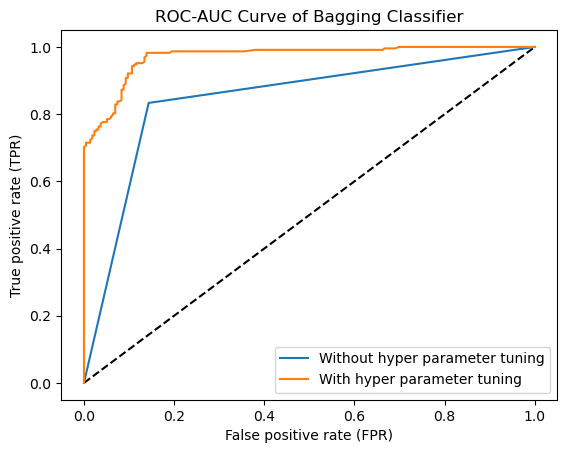

In [340]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_bag,tpr_bag,label="Without hyper parameter tuning")
plt.plot(fpr,tpr,label='With hyper parameter tuning')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('ROC-AUC Curve of Bagging Classifier')
plt.legend()
plt.show()

In [341]:
auc_score=roc_auc_score(y_test,FinalModel.predict(x_test))
print(auc_score)

0.8667153996101365


The AUC-ROC curve helps us to visualize how well our machine learning classifier is performing.From the ROC curve we can see that after hyperparameter tuning the accuracy of the model has increased to a certain extent against the one when we used default hyperparameters.

In [342]:
import pickle
filename='fraud_detection_classification.pkl'
pickle.dump(FinalModel,open(filename,'wb'))

In [343]:
import pickle
loaded_model=pickle.load(open('fraud_detection_classification.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

86.48648648648648


In [344]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=("predicted","original"))
conclusion

0    1    2    3    4    5    6    7    8    9    10   11   12   \
predicted    0    0    0    1    0    0    0    1    0    0    0    0    1   
original     0    0    0    1    0    0    0    1    0    0    1    0    0   

           13   14   15   16   17   18   19   20   21   22   23   24   25   \
predicted    0    0    0    1    0    1    1    0    0    0    0    0    1   
original     0    1    0    1    0    1    0    0    0    0    0    1    1   

           26   27   28   29   30   31   32   33   34   35   36   37   38   \
predicted    1    0    0    1    1    0    0    0    0    1    1    0    0   
original     1    0    0    1    1    1    0    0    1    1    1    0    0   

           39   40   41   42   43   44   45   46   47   48   49   50   51   \
predicted    1    0    0    1    1    0    0    0    0    0    1    1    0   
original     1    0    0    1    1    1    0    0    0    1    1    1    0   

           52   53   54   55   56   57   58   59   60   61   62   63   64   \
predicted    1    1    0    1    0    0    0    1    0    0    0    0    0   
original     1    0    1    1    0    0    0    1    0    0    0    0    1   

           65   66   67   68   69   70   71   72   73   74   75   76   77   \
predicted    1    1    1    0    0    0    1    1    1    0    0    1    1   
original     1    0    1    0    1    0    1    1    1    0    0    1    1   

           78   79   80   81   82   83   84   85   86   87   88   89   90   \
predicted    0    0    0    0    0    0    0    1    1    1    0    1    1   
original     0    1    0    0    0    0    1    1    1    1    1    1    0   

           91   92   93   94   95   96   97   98   99   100  101  102  103  \
predicted    1    1    1    1    0    1    1    1    0    1    0    0    1   
original     1    1    1    1    0    1    0    1    0    1    0    0    1   

           104  105  106  107  108  109  110  111  112  113  114  115  116  \
predicted    0    1    1    0    1    0    0    1    0    1    1    0    0   
original     1    1    1    0    1    0    0    1    1    1    1    0    0   

           117  118  119  120  121  122  123  124  125  126  127  128  129  \
predicted    0    0    1    1    1    0    0    1    1    1    0    0    1   
original     0    0    1    1    1    0    1    1    1    1    0    0    1   

           130  131  132  133  134  135  136  137  138  139  140  141  142  \
predicted    0    1    1    0    1    1    0    0    0    0    0    1    0   
original     0    1    1    0    1    1    0    1    0    0    0    1    0   

           143  144  145  146  147  148  149  150  151  152  153  154  155  \
predicted    1    0    0    1    1    0    1    1    0    0    1    0    0   
original     1    0    0    1    1    0    1    1    0    0    1    0    0   

           156  157  158  159  160  161  162  163  164  165  166  167  168  \
predicted    0    0    0    0    1    1    1    1    1    1    1    1    0   
original     1    0    0    0    1    1    1    1    1    1    0    1    0   

           169  170  171  172  173  174  175  176  177  178  179  180  181  \
predicted    0    0    0    0    0    1    0    1    1    1    1    1    0   
original     1    0    0    0    0    1    1    1    1    1    1    1    0   

           182  183  184  185  186  187  188  189  190  191  192  193  194  \
predicted    0    1    1    1    0    0    1    0    0    0    1    0    1   
original     1    1    1    1    1    0    1    0    0    0    1    0    1   

           195  196  197  198  199  200  201  202  203  204  205  206  207  \
predicted    1    0    0    1    0    0    0    0    0    0    1    1    0   
original     1    0    0    1    0    0    0    0    0    0    1    0    0   

           208  209  210  211  212  213  214  215  216  217  218  219  220  \
predicted    0    0    1    0    0    0    0    0    1    0    0    1    1   
original     0    1    1    0    0    0    0    0    1    0    0    1    1   

           221  

Conclusion:
In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier , bagging classifier and Ada Boost classifier.
A hyperparameter tuned Bagging classifier gives the highest accuracy score of 86.94 and f1 score of 86.38.